# Software Development Capability Analysis
## by Marc Vitalis

## Preliminary Wrangling

This dataset is extracted from Team Foundation Server. It describes the software development done in our project. It contains the major timestamp of when the work started, being worked on and done. The team has started development last October 2014 and underwent three changes in software development methodologies.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.api.types import CategoricalDtype
import pandas.plotting._converter as pandacnv

%matplotlib inline
pandacnv.register()

In [2]:
# load the dataset
workitems = pd.read_csv('workitems_master.csv')
workitems.head()

,id,workitem_type,estimate,words,rel,sprint,assigned_to,new,doing,done,actual_work,era
0,797499,Story,80.0,"ancillary,optimization,price",NaN,NaN,navarrj,2014-10-11 04:38:57.880,2014-10-11 04:38:58.517,2014-10-11 04:39:11.530,0,waterfall
1,797559,Bug,NaN,"allows,comparison,currencies,different,engine,...",NaN,NaN,navarrj,2014-10-11 04:42:56.663,2014-10-11 04:42:57.200,2014-10-11 04:42:58.273,0,waterfall
2,797564,Bug,NaN,"pollingintervalseconds,tokenized",NaN,NaN,navarrj,2014-10-11 04:43:14.343,2014-10-11 04:43:14.937,2014-10-11 04:43:15.983,0,waterfall
3,797575,Bug,NaN,"createdutc,import,included,json,optimization,tool",NaN,NaN,navarrj,2014-10-11 04:43:48.687,2014-10-11 04:43:52.327,2014-10-11 04:43:52.957,0,waterfall
4,797576,Bug,NaN,"analytics,exporting,fields,importer,null",NaN,NaN,navarrj,2014-10-11 04:43:54.870,2014-10-11 04:43:57.573,2014-10-11 04:43:58.137,0,waterfall


In [3]:
# column summary
workitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 12 columns):
id               1466 non-null int64
workitem_type    1466 non-null object
estimate         264 non-null float64
words            1461 non-null object
rel              517 non-null object
sprint           1348 non-null float64
assigned_to      979 non-null object
new              1466 non-null object
doing            1466 non-null object
done             1466 non-null object
actual_work      1466 non-null int64
era              1466 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 137.5+ KB


**Convert Dates to Date type**

Date format are represented as string (object), we should change them first to datetime format.

In [4]:
# convert to date time
workitems.new = pd.to_datetime(workitems.new)
workitems.doing = pd.to_datetime(workitems.doing)
workitems.done = pd.to_datetime(workitems.done)

workitems.head()

,id,workitem_type,estimate,words,rel,sprint,assigned_to,new,doing,done,actual_work,era
0,797499,Story,80.0,"ancillary,optimization,price",NaN,NaN,navarrj,2014-10-11 04:38:57.880,2014-10-11 04:38:58.517,2014-10-11 04:39:11.530,0,waterfall
1,797559,Bug,NaN,"allows,comparison,currencies,different,engine,...",NaN,NaN,navarrj,2014-10-11 04:42:56.663,2014-10-11 04:42:57.200,2014-10-11 04:42:58.273,0,waterfall
2,797564,Bug,NaN,"pollingintervalseconds,tokenized",NaN,NaN,navarrj,2014-10-11 04:43:14.343,2014-10-11 04:43:14.937,2014-10-11 04:43:15.983,0,waterfall
3,797575,Bug,NaN,"createdutc,import,included,json,optimization,tool",NaN,NaN,navarrj,2014-10-11 04:43:48.687,2014-10-11 04:43:52.327,2014-10-11 04:43:52.957,0,waterfall
4,797576,Bug,NaN,"analytics,exporting,fields,importer,null",NaN,NaN,navarrj,2014-10-11 04:43:54.870,2014-10-11 04:43:57.573,2014-10-11 04:43:58.137,0,waterfall


In [5]:
#review new columns converted
workitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 12 columns):
id               1466 non-null int64
workitem_type    1466 non-null object
estimate         264 non-null float64
words            1461 non-null object
rel              517 non-null object
sprint           1348 non-null float64
assigned_to      979 non-null object
new              1466 non-null datetime64[ns]
doing            1466 non-null datetime64[ns]
done             1466 non-null datetime64[ns]
actual_work      1466 non-null int64
era              1466 non-null object
dtypes: datetime64[ns](3), float64(2), int64(2), object(5)
memory usage: 137.5+ KB


**Convert Releases to Numeric**

In [6]:
# make sure that empty sprint values are defaulted to zero
workitems.loc[workitems.sprint.isna(), 'sprint'] = 0
workitems.sprint = workitems.sprint.astype(int)
workitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 12 columns):
id               1466 non-null int64
workitem_type    1466 non-null object
estimate         264 non-null float64
words            1461 non-null object
rel              517 non-null object
sprint           1466 non-null int32
assigned_to      979 non-null object
new              1466 non-null datetime64[ns]
doing            1466 non-null datetime64[ns]
done             1466 non-null datetime64[ns]
actual_work      1466 non-null int64
era              1466 non-null object
dtypes: datetime64[ns](3), float64(1), int32(1), int64(2), object(5)
memory usage: 131.8+ KB


**Convert Category Types**

In [7]:
# check distinct values for workitem_type
workitems.workitem_type.value_counts()

Bug      1121
Story     275
Issue      70
Name: workitem_type, dtype: int64

In [8]:
# convert work item type to category
workitem_types = CategoricalDtype(categories = ['Story', 'Bug', 'Issue'], ordered=True) # make sure ordered to maintain view consistency in graphs
workitems.workitem_type = workitems.workitem_type.astype(workitem_types)
workitems.head()

,id,workitem_type,estimate,words,rel,sprint,assigned_to,new,doing,done,actual_work,era
0,797499,Story,80.0,"ancillary,optimization,price",NaN,0,navarrj,2014-10-11 04:38:57.880,2014-10-11 04:38:58.517,2014-10-11 04:39:11.530,0,waterfall
1,797559,Bug,NaN,"allows,comparison,currencies,different,engine,...",NaN,0,navarrj,2014-10-11 04:42:56.663,2014-10-11 04:42:57.200,2014-10-11 04:42:58.273,0,waterfall
2,797564,Bug,NaN,"pollingintervalseconds,tokenized",NaN,0,navarrj,2014-10-11 04:43:14.343,2014-10-11 04:43:14.937,2014-10-11 04:43:15.983,0,waterfall
3,797575,Bug,NaN,"createdutc,import,included,json,optimization,tool",NaN,0,navarrj,2014-10-11 04:43:48.687,2014-10-11 04:43:52.327,2014-10-11 04:43:52.957,0,waterfall
4,797576,Bug,NaN,"analytics,exporting,fields,importer,null",NaN,0,navarrj,2014-10-11 04:43:54.870,2014-10-11 04:43:57.573,2014-10-11 04:43:58.137,0,waterfall


In [9]:
# descriptive statistics
workitems.describe()

,id,estimate,sprint,actual_work
count,1.466000e+03,264.000000,1466.000000,1466.000000
mean,1.507790e+06,24.667803,17.804911,7.023192
std,3.884488e+05,44.358716,13.311449,12.798496
min,7.974990e+05,0.500000,0.000000,-34.000000
25%,1.232422e+06,5.000000,4.000000,0.000000
50%,1.496096e+06,12.000000,19.000000,1.000000
75%,1.802145e+06,30.000000,28.000000,8.000000
max,2.341603e+06,460.000000,48.000000,94.000000


### What is the structure of your dataset?

The dataset consists of 1466 rows, with 11 features (workitem_type, estimate, words, rel (release), sprint, assigned_to, new (date started), doing (date started working), done, actual work (done - doing) and era. Variables main point of interest are the date stamps for the work. Some are just to describe the work item such as sprint, estimate, release, assigned_to and era.

### What is/are the main feature(s) of interest in your dataset?

I'm more interested how variables affects `actual_work`. The goal is find out for the patterns that affects the actual work. This field also can help us find out if the team is getting better or not.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The team underwent to three (3) SDLC pattern (non-structured, semi-agile, scrum). The date stamps are very important (`new`, `doing`, `done`), this will help me extract important information, such as days of the week, months, or observe the time flow pattern if the SDLC pattern improves through time, or made it worst. I would like to also observe if work is properly distributed to the team or not. The other features such as `estimate`, `assigned_to` and `era` would help me answer this.

## Univariate Exploration

First to explore is the main point of interest, `actual_work`. How is the actual days of work distributed?

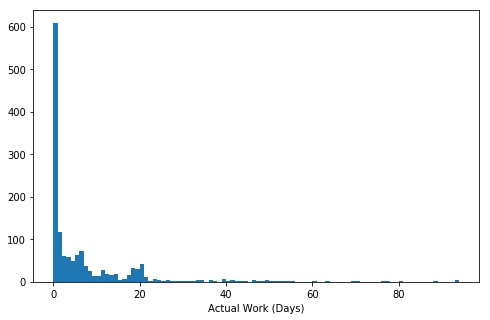

In [10]:
# explore distribution in standard scale

binsize = 1
bins = np.arange(0, workitems.actual_work.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = workitems, x = 'actual_work', bins = bins)
plt.xlabel('Actual Work (Days)')
plt.show()

There's a huge spike on the 0-1 area, it's unlikely to have a workitem with zero day done, that is considered as no effort. Let's tidy this a bit.

In [11]:
#zero sum should be converted to a day of work if they have worked on it at least 2h
zero_work = workitems.actual_work == 0
workitems.loc[zero_work, 'actual_work'] = 1

#just remove the zero effort ones
workitems = workitems[((workitems.done - workitems.doing) / pd.Timedelta(hours = 1)) >  2]

#remove the time stamps in new, doing and done, as we are measuring workitems by date
workitems.new = pd.to_datetime(workitems.new.dt.date)
workitems.doing = pd.to_datetime(workitems.doing.dt.date)
workitems.done = pd.to_datetime(workitems.done.dt.date)

workitems.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117 entries, 26 to 1465
Data columns (total 12 columns):
id               1117 non-null int64
workitem_type    1117 non-null category
estimate         246 non-null float64
words            1113 non-null object
rel              452 non-null object
sprint           1117 non-null int32
assigned_to      667 non-null object
new              1117 non-null datetime64[ns]
doing            1117 non-null datetime64[ns]
done             1117 non-null datetime64[ns]
actual_work      1117 non-null int64
era              1117 non-null object
dtypes: category(1), datetime64[ns](3), float64(1), int32(1), int64(2), object(4)
memory usage: 101.5+ KB


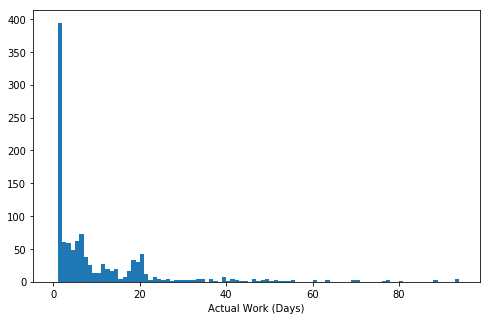

In [12]:
# distribution still on standard scale

plt.figure(figsize=[8, 5])
plt.hist(data = workitems, x = 'actual_work', bins = bins)
plt.xlabel('Actual Work (Days)')
plt.show()

Still a huge spike in 1, and have a very long tail, let's redistribute it with log scale.

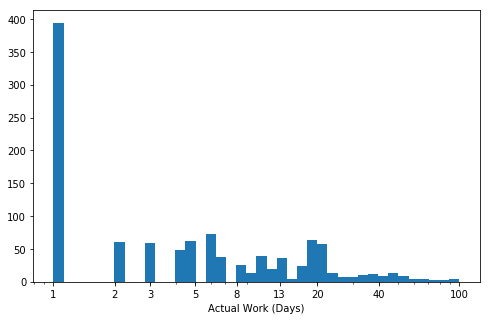

In [13]:
# distribution on log scale
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(workitems['actual_work'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = workitems, x = 'actual_work', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 3, 5, 8, 13, 20, 40, 100], [1, 2, 3, 5, 8, 13, 20, 40, 100])
plt.xlabel('Actual Work (Days)')
plt.show()

We still have a big spike at one day work, and another clump in `20` days, somehow even distribution from `2-20`. On the later sprints, the team is now doing a 3 week scrum, which is somehow the same to 20 days.

It seems unusual to have work items that's take more than 30 days. Also, there's a big value on workitems th Let's try to find out if they are outliers.

The first thing to look at are the ones with value `1`.

In [14]:
#get items with actual_work = 1, and investigate the data
ones = workitems[workitems.actual_work == 1]
ones

,id,workitem_type,estimate,words,rel,sprint,assigned_to,new,doing,done,actual_work,era
28,817499,Bug,NaN,"refactor,suggestions",NaN,0,navarrj,2014-11-17,2014-11-17,2014-11-17,1,waterfall
39,847759,Bug,NaN,"build,errors,files,fix,folder,missing,mmtempla...",NaN,1,navarrj,2015-01-13,2015-01-13,2015-01-14,1,waterfall
47,891430,Bug,NaN,"calculatedfrom,computation,correct",NaN,6,navarrj,2015-03-23,2015-03-23,2015-03-23,1,waterfall
50,892179,Bug,NaN,"analytics,missing,records,ruletype",NaN,6,beckrob,2015-03-23,2015-03-25,2015-03-25,1,waterfall
51,892184,Bug,NaN,"experiment,have,make,old,optimization,optimiza...",NaN,6,beckrob,2015-03-23,2015-03-24,2015-03-25,1,waterfall
56,896967,Bug,NaN,"closed,dialog,host,killed,manager,opened,proce...",NaN,6,navarrj,2015-03-30,2015-04-06,2015-04-07,1,waterfall
60,899080,Bug,2.0,"cannot,cleared,derivedinputparameter,records",NaN,7,navarrj,2015-04-01,2015-04-06,2015-04-07,1,waterfall
63,899456,Bug,NaN,"analytics,causes,collisions,endpoint,host,name...",NaN,7,whitakn,2015-04-01,2015-04-15,2015-04-16,1,waterfall
64,900506,Bug,1.0,"categorical,decisiontree,error,import,splitpoi...",NaN,7,navarrj,2015-04-06,2015-04-06,2015-04-07,1,waterfall
65,900528,Bug,4.0,"decisiontree,encountered,error,getting,optimiz...",NaN,7,vitalim,2015-04-06,2015-04-06,2015-04-07,1,waterfall


In [15]:
# check values for items with actual work = 1
ones.workitem_type.value_counts()

Bug      353
Issue     21
Story     20
Name: workitem_type, dtype: int64

By investigation, most of the workitems with `actual_work == 1` are mostly bugs. Now this make sense as bugs usually are quick to fix. Let's get their actual values.

Next, let's investigate those workitems with more than 30 days value.

In [16]:
# check values with actual work > 30
workitems[workitems.actual_work > 30]

,id,workitem_type,estimate,words,rel,sprint,assigned_to,new,doing,done,actual_work,era
35,831062,Story,66.0,"analytics,decision,engine,processing,rules,tree",NaN,1,olsonju,2014-12-09,2014-12-15,2015-01-21,36,waterfall
37,831074,Story,19.0,"analytics,reports",NaN,0,NaN,2014-12-09,2015-03-05,2015-05-13,69,waterfall
44,870426,Story,84.0,cleanup,NaN,13,vitalim,2015-02-18,2015-06-01,2015-07-14,42,waterfall
92,925183,Bug,3.0,"analyticsdw,dependency,findtreatmentflatbyopti...",NaN,15,NaN,2015-05-14,2015-06-09,2015-07-29,49,waterfall
98,933712,Bug,6.0,"console,logout,management,working",NaN,15,NaN,2015-05-27,2015-06-09,2015-07-28,48,waterfall
99,933767,Bug,24.0,"about,console,help,management,working",NaN,15,NaN,2015-05-27,2015-06-09,2015-07-28,48,waterfall
100,933997,Bug,3.0,"bug,currency,default,handling",NaN,17,NaN,2015-05-27,2015-06-09,2015-07-29,49,waterfall
106,941967,Bug,3.0,"column,currency,dynamic,experiment,header,impa...",NaN,0,NaN,2015-06-08,2015-08-27,2015-10-22,55,waterfall
108,946736,Bug,8.0,"always,dependency,inputparameters,nca,remove,t...",NaN,15,NaN,2015-06-15,2015-06-15,2015-07-30,44,waterfall
110,957941,Story,460.0,"apo,basic,coverage,gui,increase",NaN,19,NaN,2015-07-02,2015-08-27,2015-11-13,77,waterfall


Items here are either from our work when we are still doing `waterfall`, or the newer ones, they are legitimate workitems that got back and forth in development, and some went to hiatus, and still they are valid data.

Let's find out the averages.

In [17]:
# actual days of work averages, mean, median mode
[workitems.actual_work.mean(), workitems.actual_work.median(), workitems.actual_work.mode()]

[9.53983885407341, 4.0, 0    1
 dtype: int64]

We have different data here. Mean, says a workitem can be done 10 days, average. This is hardly conclusive as we have work items that's pulling the value up. Median however, makes a bit more sense as a normal workitem is normally done 5 days. 1 has more occurrence, but since this data is not categorical, it just provides a bit of information about the data.

Based from the information gathered from the team, one day of work are mostly possible for what they call `Bug Fest`. More exploring on the relationship of the `actual_work` and `workitem_type`. 

How many of our work items are stories, bugs or issues?

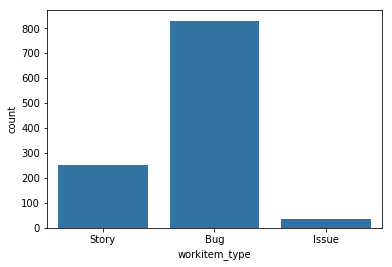

In [18]:
# number of workitems per work item type

# define the base color
base_color = sb.color_palette()[0]

sb.countplot(data = workitems, x = 'workitem_type', color = base_color)

That's a big number of bugs in comparison to stories. This reflects the quality has not been the main focus of the development.

Before we proceed, let's do some extraction to the corrent data we have.

In [19]:
# let's extract the dates first
workitems['doing_year'] = workitems.doing.dt.year
workitems['done_year'] = workitems.done.dt.year
workitems['new_year'] = workitems.new.dt.year

# date format %b - three char string value of month, ex. Jan Feb
workitems['doing_month'] = workitems.doing.dt.strftime('%b')
workitems['done_month'] = workitems.done.dt.strftime('%b')
workitems['new_month'] = workitems.new.dt.strftime('%b')

# date format %a - three char string value of day of week, ex. Mon Tue
workitems['doing_dow'] = workitems.doing.dt.strftime('%a')
workitems['done_dow'] = workitems.done.dt.strftime('%a')
workitems['new_dow'] = workitems.new.dt.strftime('%a')

# date format %b %Y - month name with this format example - Jan 2017
workitems['doing_my'] = workitems.doing.dt.strftime('%b %Y')
workitems['done_my'] = workitems.done.dt.strftime('%b %Y')
workitems['new_my'] = workitems.new.dt.strftime('%b %Y')

# create the categorical types, ordering ensures that the view are in order when plotting in graphs
weekdays_type = CategoricalDtype(categories=['Mon' , 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)
months_type = CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered = True)

#generate the months from workitems min to max value and create a ordered category from it.
my_type = CategoricalDtype(categories = pd.to_datetime(np.arange(workitems.new.min(), workitems.done.max() + pd.DateOffset(months = 1), 1, dtype='datetime64[M]')).strftime('%b %Y'), ordered = True)

workitems.doing_month = workitems.doing_month.astype(months_type)
workitems.done_month = workitems.done_month.astype(months_type)
workitems.new_month = workitems.new_month.astype(months_type)

workitems.doing_dow = workitems.doing_dow.astype(weekdays_type)
workitems.done_dow = workitems.done_dow.astype(weekdays_type)
workitems.new_dow = workitems.new_dow.astype(weekdays_type)

workitems.new_my = workitems.new_my.astype(my_type)
workitems.doing_my = workitems.doing_my.astype(my_type)
workitems.done_my = workitems.done_my.astype(my_type)

workitems.head()

,id,workitem_type,estimate,words,rel,sprint,assigned_to,new,doing,done,...,new_year,doing_month,done_month,new_month,doing_dow,done_dow,new_dow,doing_my,done_my,new_my
26,799056,Story,66.0,"analytic,logging,treatment",NaN,0,vitalim,2014-10-13,2014-11-17,2014-11-26,...,2014,Nov,Nov,Oct,Mon,Wed,Mon,Nov 2014,Nov 2014,Oct 2014
28,817499,Bug,NaN,"refactor,suggestions",NaN,0,navarrj,2014-11-17,2014-11-17,2014-11-17,...,2014,Nov,Nov,Nov,Mon,Mon,Mon,Nov 2014,Nov 2014,Nov 2014
29,819151,Bug,NaN,"default,logging,treatment,values",NaN,0,navarrj,2014-11-19,2014-11-19,2014-11-24,...,2014,Nov,Nov,Nov,Wed,Mon,Wed,Nov 2014,Nov 2014,Nov 2014
30,820565,Bug,NaN,"cache,check,logger,setting,treatment",NaN,0,vitalim,2014-11-21,2014-11-21,2014-11-24,...,2014,Nov,Nov,Nov,Fri,Mon,Fri,Nov 2014,Nov 2014,Nov 2014
33,826643,Story,47.0,"analytics,automation,factory",NaN,6,vitalim,2014-12-01,2015-03-20,2015-04-01,...,2014,Mar,Apr,Dec,Fri,Wed,Mon,Mar 2015,Apr 2015,Dec 2014


How are workitems distributed monthly? We are just getting the total workitems regardless of type for now.

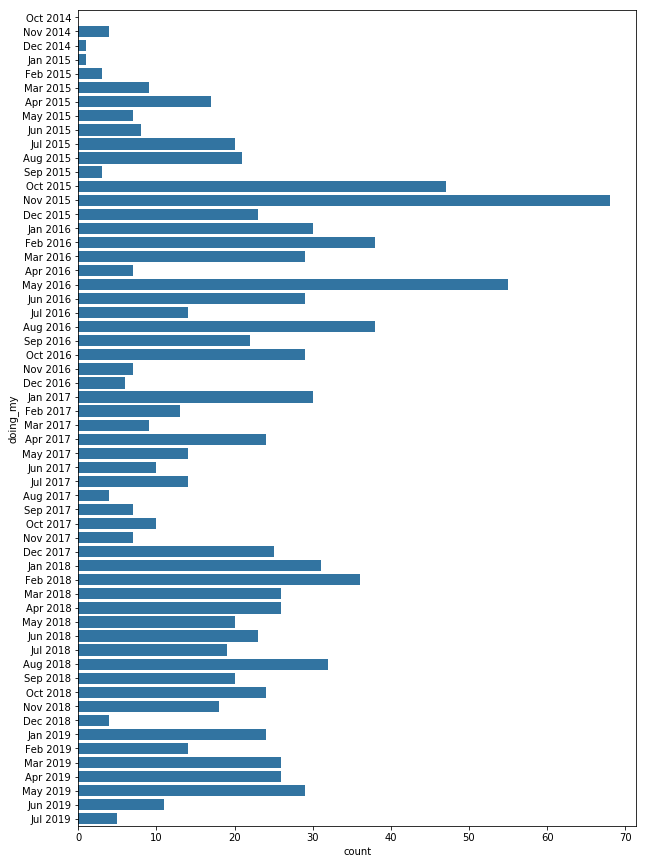

In [20]:
# plot the number of workitems per month
plt.figure(figsize=(10, 15))
sb.countplot(data = workitems, y = 'doing_my', color = base_color)

As the date has become more recent, it's getting more consistent on the number of workitems. However, the pattern is still irregular. We don't know yet the distribution of how many of these are stories, bugs or issues. More on that later.

With scrums, there's a normal trend that during end of sprint, there's a spike of things suddenly getting done. Let's investigate the distribution on weekdays, both on `doing` and `done`.

How many of the work items that the team started working on a certain day of the week?

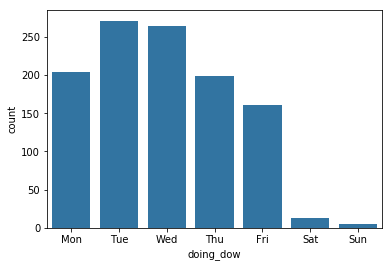

In [21]:
# plot the number of work items started per days of week
sb.countplot(data = workitems, x = 'doing_dow', color = base_color)

How many of the work items completed on a certain day of the week?

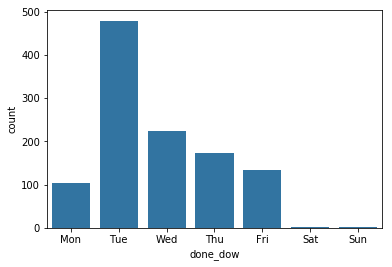

In [22]:
#number of work items done per days of week
sb.countplot(data = workitems, x = 'done_dow', color = base_color)

More items are started and done on Tuesdays, then tends to slow down throughout the week. The teams' last day of sprint is Wednesday. This could be a point for discussion with the team as to why they have this pattern.

What is the distribution for new items created per month?

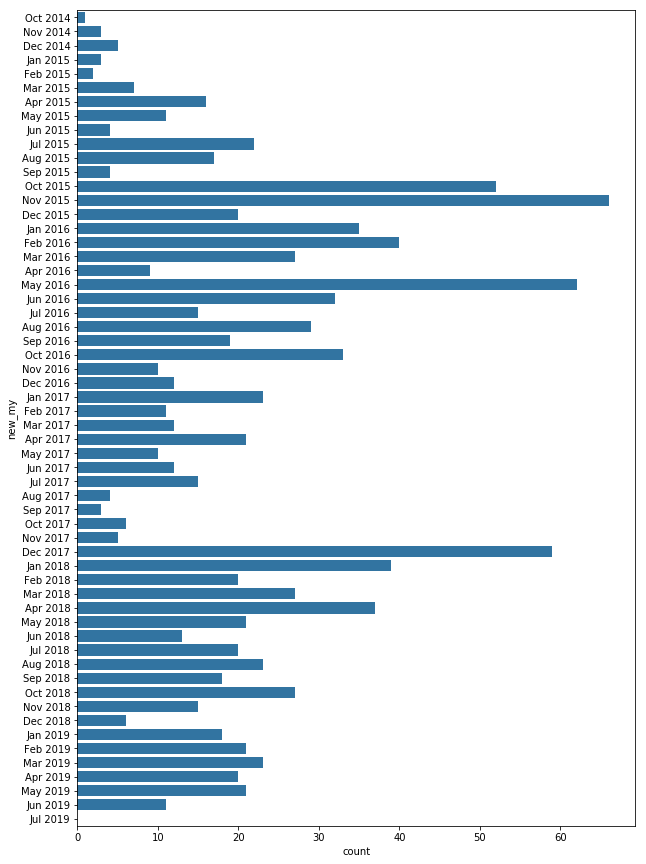

In [23]:
# number of work items created per month
plt.figure(figsize=(10, 15))
sb.countplot(data = workitems, y = 'new_my', color = base_color)

There are 3 occurences when stories are created in bulk, `November 2015`, `May 2016` and `Dec 2017`. These are interesting points to ask what happened during these events.

What days of the week mostly these new workitems are created?

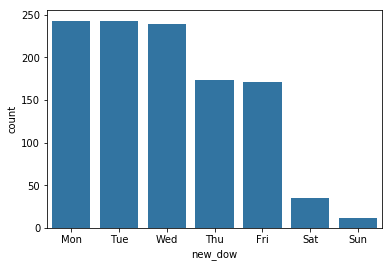

In [24]:
# number of work items created per day of week
sb.countplot(data = workitems, x = 'new_dow', color = base_color)

There's a balance on when they add stories from `Mondays` to `Wednesdays`, and `Thursdays` and `Fridays` are lower but bit the same, of course `Saturdays` and `Sundays` are holidays.

How is work distributed per sprint?

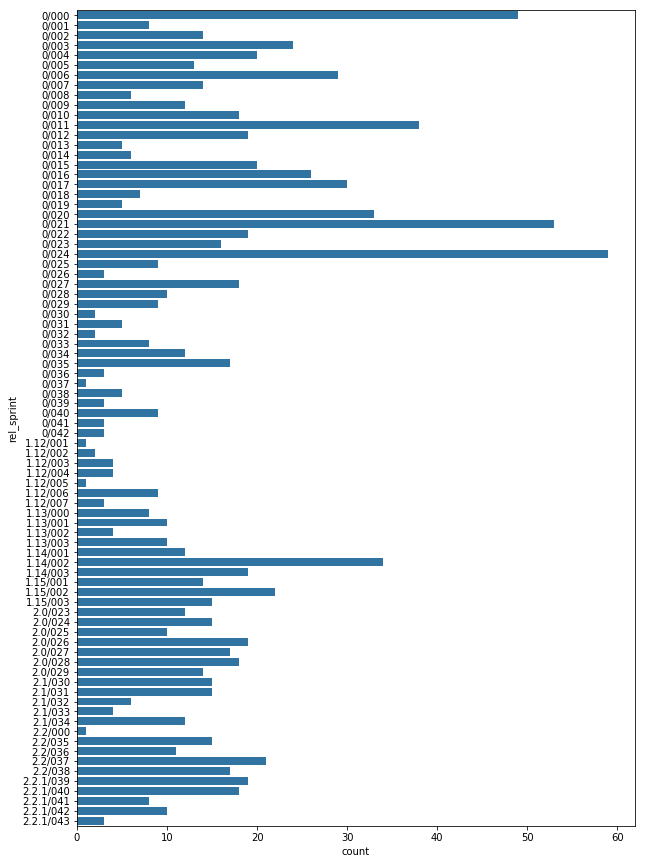

In [25]:
# number of work items per sprint
work_sprint = workitems

# try to perform additional cleaning first, set np.NaN release to zero
work_sprint.loc[work_sprint.rel.isna(), 'rel'] = '0'
work_sprint = work_sprint.sort_values(['rel', 'sprint'])

# combine release and sprint, slash-separated, ex, 1.12/001
work_sprint['rel_sprint'] = work_sprint.rel + '/' + work_sprint.sprint.astype(str).str.pad(width = 3, side = 'left', fillchar = '0')

plt.figure(figsize=(10, 15))
sb.countplot(data = work_sprint, y = 'rel_sprint', color = base_color)

The work items in each releases vary. Although there are items that slotted in Sprint zero which means there might be error in input on those. Since we have lots of missing data here, we'll just investigate the data per month going forward.

How are the estimates distributed?

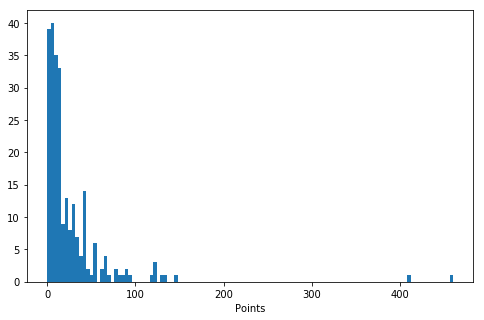

In [26]:
# estimates distribution - standard scale
binsize = 4
bins = np.arange(0, workitems.estimate.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = workitems, x = 'estimate', bins = bins)
plt.xlabel('Points')
plt.show()

Again, it has a long tail. Let's try plotting the log.

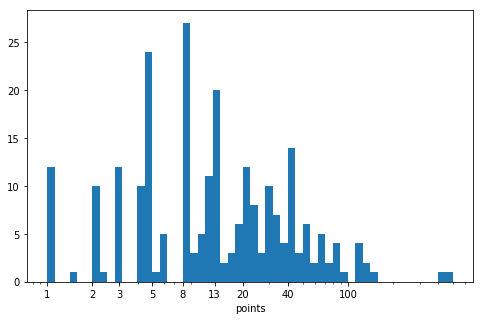

In [27]:
# estimates distribution - log scale since it has a long tail
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(workitems['estimate'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = workitems, x = 'estimate', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 3, 5, 8, 13, 20, 40, 100], [1, 2, 3, 5, 8, 13, 20, 40, 100]) #fibonacci poker points
plt.xlabel('points')
plt.show()

Distribution has its peak between 5 to 13 estimates. Based on my conversation with the team, this is the 'just enough' size of stories.

What are the top words in the work item titles?

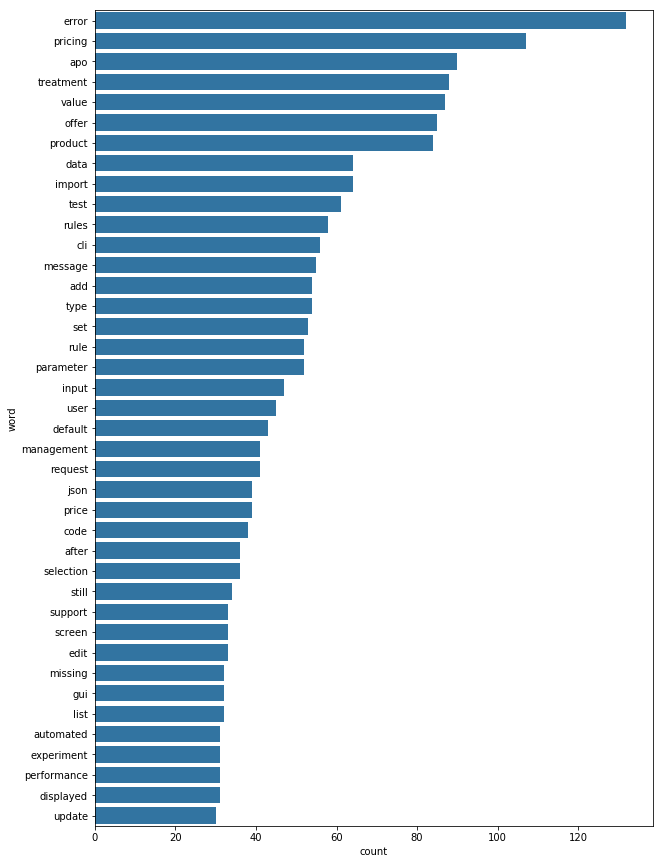

In [28]:
# top 40 word occurence on workitems title

work_words = workitems[['id', 'words']]

# right now words are comma-delimited values, we'll try to melt them on it's own rows
work_words = work_words[['id', 'words']].words.str.split(',').apply(pd.Series) \
    .merge(work_words[['id', 'words']], right_index = True, left_index = True) \
    .drop(["words"], axis = 1) \
    .melt(id_vars = ['id'], value_name = "word") \
    .drop("variable", axis = 1) \
    .dropna()

plt.figure(figsize=(10, 15))

# plot only the top 40
sb.countplot(data = work_words, y = 'word', color = base_color, order = work_words.word.value_counts().iloc[:40].index)

Results are interesting. Top entry is `error`, which probably evident mostly on bug items. Other items in top 40 mostly can describe the application itself.

What's the distribution of work per resource?

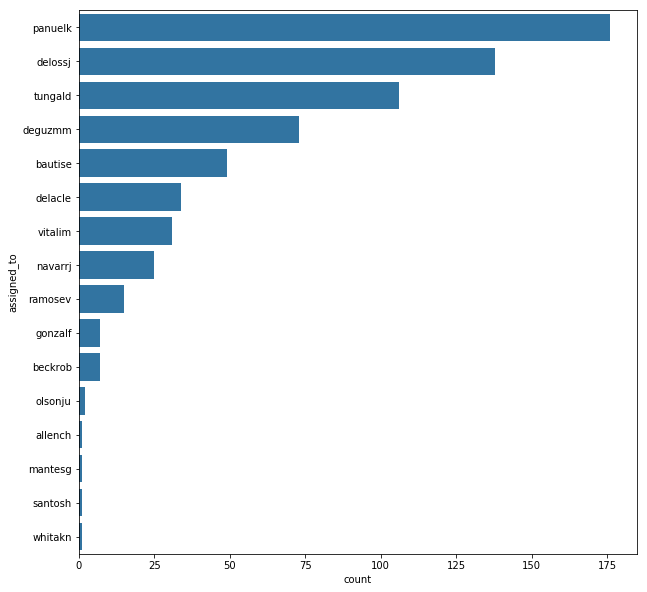

In [29]:
# number of workitems per resource
plt.figure(figsize=(10, 10))
sb.countplot(data = workitems, y = 'assigned_to', color = base_color, order = workitems.assigned_to.value_counts().iloc[:40].index)

`panuelk` has the most number of items worked on. This maybe inconclusive for now, we'll explore more on this later.

How many work done per era?

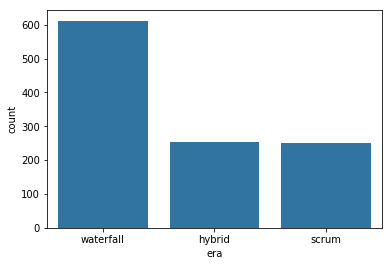

In [30]:
# number of workitems per era
sb.countplot(data = workitems, x = 'era', color = base_color)

Since waterfall era runs longer the most, it makes sense that it has more work items. Hybrid and scrums has almost same number of work.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The actual work contains `zero` days which means `no effort`. I recalculated the actual effort by getting what's normally considered as work which is `2 hours`, and considered that already as one day of work. There are also what seems to be outliers, with high value in `one-day work`, however, with investigation, I found out that these are mostly bugs which makes sense as bugs are usually easy to get done. On the high spectrum, I checked them online the patterns on why they have large values. Some of them are from our waterfall method which consists of large `stories` and took days to months to finished. Some of the data are also difficult to resolve which spanned to multiple sprints. I feel that they are important part of our data for now.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I recalculated `actual_work` to weed out the `no effort` stories. The words field are comma-delimited string, was converted into it's own data frame so we can examine them individually. To investigate individual characteristics of the dates, i also extracted `year`, `month` and `dow` of `new`, `doing` and `done`.

## Bivariate Exploration

What's the correlation between numeric features?

In [31]:
# describe the columns with the new derived one
workitems.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117 entries, 26 to 1465
Data columns (total 24 columns):
id               1117 non-null int64
workitem_type    1117 non-null category
estimate         246 non-null float64
words            1113 non-null object
rel              1117 non-null object
sprint           1117 non-null int32
assigned_to      667 non-null object
new              1117 non-null datetime64[ns]
doing            1117 non-null datetime64[ns]
done             1117 non-null datetime64[ns]
actual_work      1117 non-null int64
era              1117 non-null object
doing_year       1117 non-null int64
done_year        1117 non-null int64
new_year         1117 non-null int64
doing_month      1117 non-null category
done_month       1117 non-null category
new_month        1117 non-null category
doing_dow        1117 non-null category
done_dow         1117 non-null category
new_dow          1117 non-null category
doing_my         1117 non-null category
done_my          1117 n

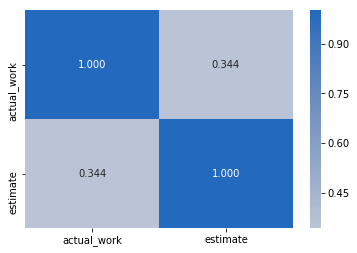

In [32]:
# define numeric and categoric variables
numeric_vars = ['actual_work', 'estimate']
categoric_vars = ['workitem_type', 'era', 'new_month', 'doing_month', 'done_month', 'new_dow', 'doing_dow', 'done_dow']

# remove null estimates
work_est = workitems[~workitems.estimate.isna()]

sb.heatmap(work_est[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

We only have 2 numeric variables. We only got 0.34 for estimate vs. actual, which means it's not enough to have a relationship.

How are numeric variables distributed against each other?

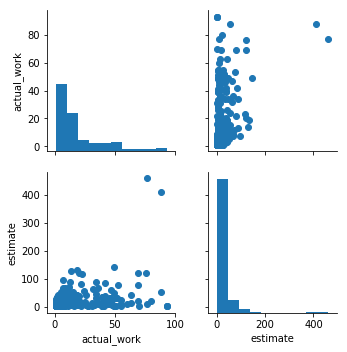

In [33]:
# numerical variables distribution

g = sb.PairGrid(data = work_est, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 10)
g.map_offdiag(plt.scatter);

It's a vertical/horizontal straight line, let's zoom in on this later.

What's the relationship summary of our categorical with numerical?

<Figure size 720x720 with 0 Axes>

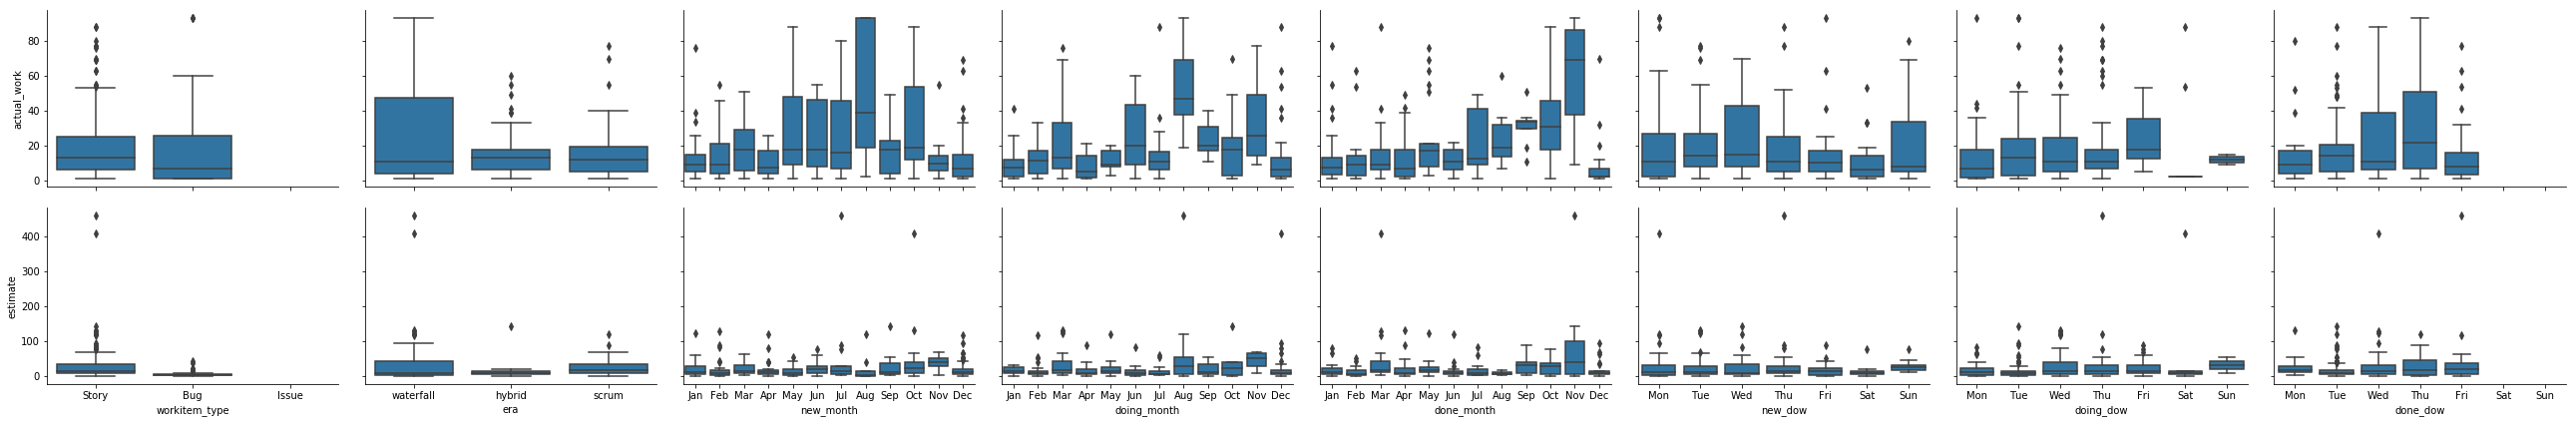

In [34]:
# plot numeric features against categorical features

# method to create a reusable boxplot for our pairgrid
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])

# numerical on y-axis, categorical on x-axis
g = sb.PairGrid(data = work_est, y_vars = numeric_vars, x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

### `actual_work` vs. `estimates`

Let's zoom in to actual work and estimates. What are the patterns comparing estimates with actual work? Draw a regression line to give more information about the graph.

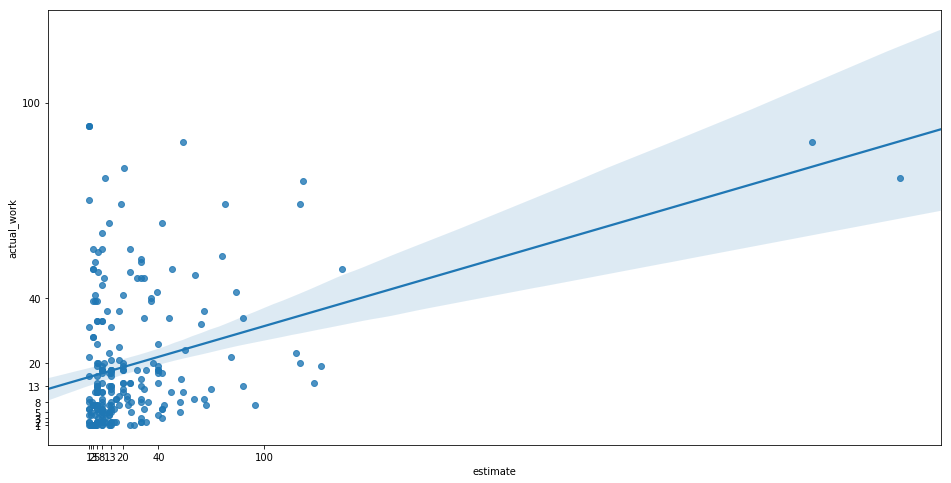

In [35]:
# estimates with actual work distribution including the regression line

plt.figure(figsize=(16, 8))
sb.regplot(data = work_est, x = 'estimate', y = 'actual_work')
ticks = [1, 2, 3, 5, 8, 13, 20, 40, 100] # fibonacci poker points
plt.xticks(ticks)
plt.yticks(ticks);

Correlation may conclude that estimates does not quite relate to the actual work done. However, looking closely at its scatter graph, estimates clump at estimate 1-40, and almost similarly, actual work clumps from 1 to 20.

### `actual_work` vs `workitem_type`

One important observation we need to know if all workitems have the same effort of work. How many days in average does each work item type take?

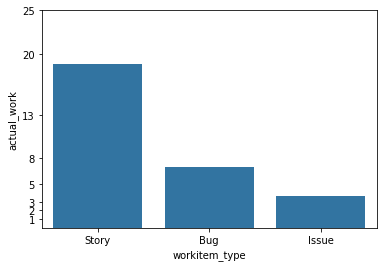

In [36]:
# average actual days of work per work item type

sb.barplot(data = workitems, x = 'workitem_type', y = 'actual_work', color = base_color, ci = None)
plt.yticks([1, 2, 3, 5, 8, 13, 20, 25]);

It may have outliers, let's have a different view with this data.

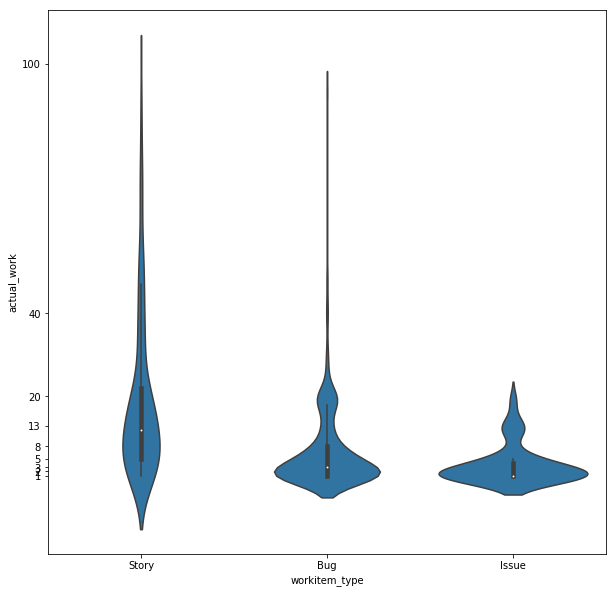

In [37]:
# plot distribution, median, percentiles for average days of work and work item type

plt.figure(figsize = (10, 10))
sb.violinplot(data = workitems, x = 'workitem_type', y = 'actual_work', color = base_color)
plt.yticks([1, 2, 3, 5, 8, 13, 20, 40, 100]); #fibonacci poker points

Based on the graph, we have outliers that pulling the value up. We need another perspective, what's the average days to complete in median for each work item type?

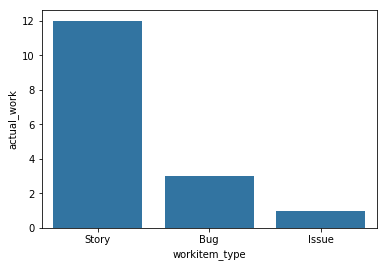

In [38]:
# median actual days of work for each work item type

sb.barplot(data = workitems, x = 'workitem_type', y = 'actual_work', color = base_color, estimator = np.median, ci = None);

Stories finish much longer than bugs and issues. Therefore we cannot have them counted in the same level when we are looking at number of workitems done on a certain period of time.

### `actual_work` vs `era`

Let's introduce capability. Capability is the average days of work per work item. What's the capability value per era?

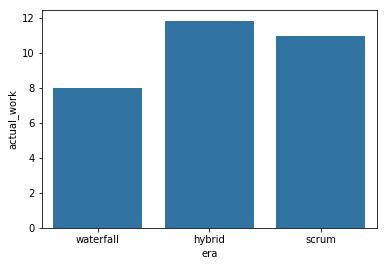

In [39]:
# average actual days of work per era

sb.barplot(data = workitems, x = 'era', y = 'actual_work', color = base_color, ci = None); #barplot default estimator is mean

Pitfalls of average is it tends to mess up when there are outliers. Let's have a different view of this data.

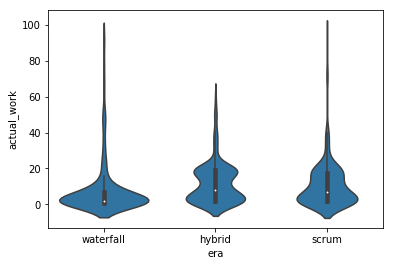

In [40]:
# median, percentiles, distribution of actual days of work per era

sb.violinplot(data = workitems, x = 'era', y = 'actual_work', color = base_color);

Waterfall has the best cycle time, which odd. To give more information, what's the distribution of work item types per era?

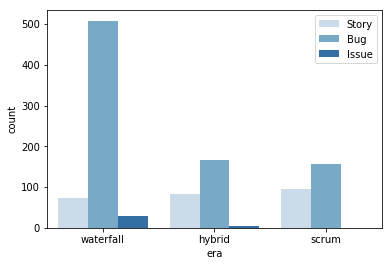

In [41]:
# number of workitems with type per era

sb.countplot(data = workitems, x = 'era', hue = 'workitem_type', palette = 'Blues')
plt.legend(loc = 'upper right');

Now this makes sense, bug fixing take shorter time to complete thus making waterfall era with the best cycle time. Also, we can notice here that during waterfall era, we produced a lot more bugs, having the story count almost the same compared to the recent era.

### `actual_work` per month

What's the teams' capabilty (regardless of workitem types for now) per month?

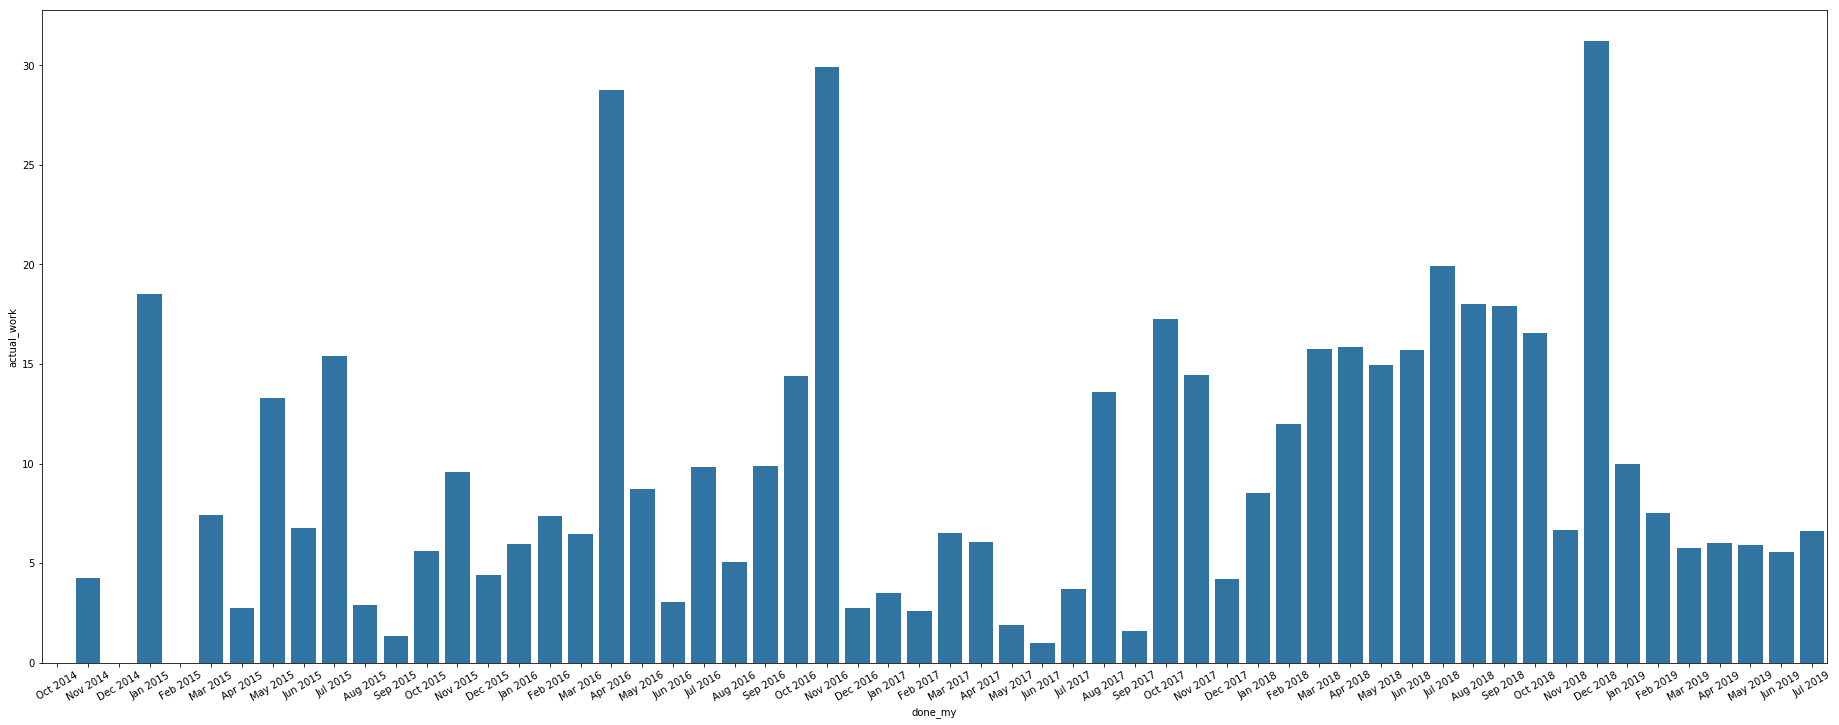

In [42]:
# average actual days of work per month

plt.figure(figsize = (32, 12))
g = sb.barplot(data = workitems, x = 'done_my', y = 'actual_work', color = base_color, ci = None)
g.set_xticklabels(g.get_xticklabels(), rotation = 30);

Teams capability (average cycle time) has some stable line recently with notable spikes. A boxplot might provide us some perspective. How are the actual days of work distributed per month? Are there any outliers? What's the median per month?

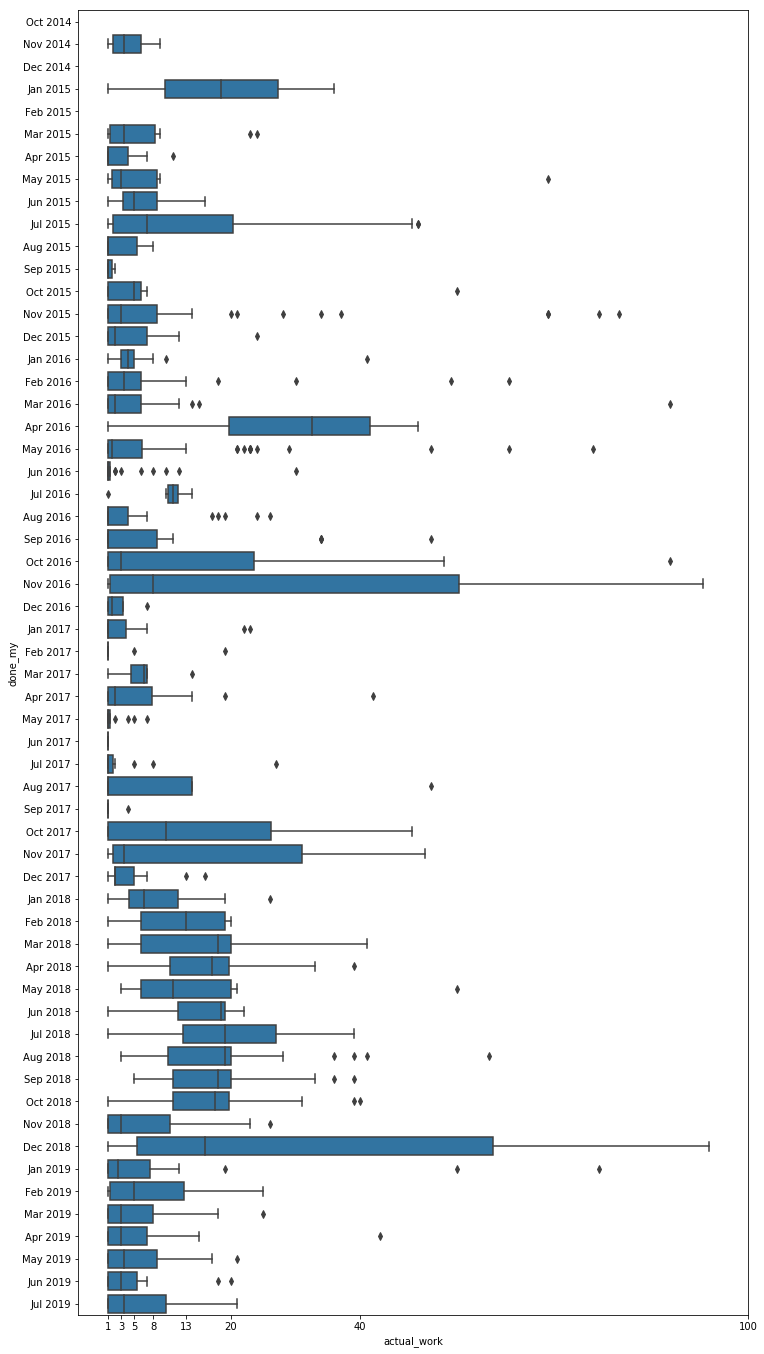

In [43]:
# percentiles, median and outliers for actual days of work per month

plt.figure(figsize = (12, 24))
sb.boxplot(data = workitems, y = 'done_my', x = 'actual_work', color = base_color)
plt.xticks([1, 3, 5, 8, 13, 20, 40, 100]);

We can notice some spikes and high value. There are lots of outliers in the early months, but starts to decrease in time. Median average doesn't go far with the mean previously.

How many work items distributed per month?

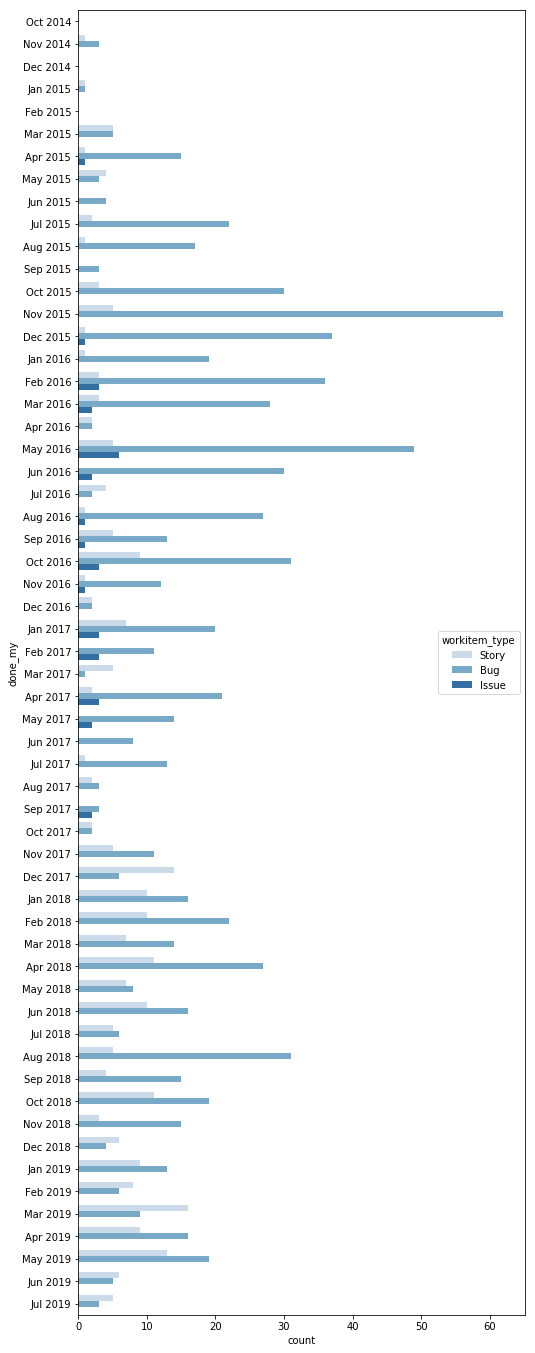

In [44]:
# number of work items with work item type per month

plt.figure(figsize = (8, 24))
sb.countplot(data = workitems, y = 'done_my', hue = 'workitem_type', palette = 'Blues');

Visually inspecting the graph, we can observe a dividing with different patterns on August 2017. This is consistent with the waterfall era on top, and hybrid+scrum era at the bottom.

### `actual_work` vs. `assigned_to`

One factor that can affect capability are the resource working on the work items. First we observe is capability for each resource.

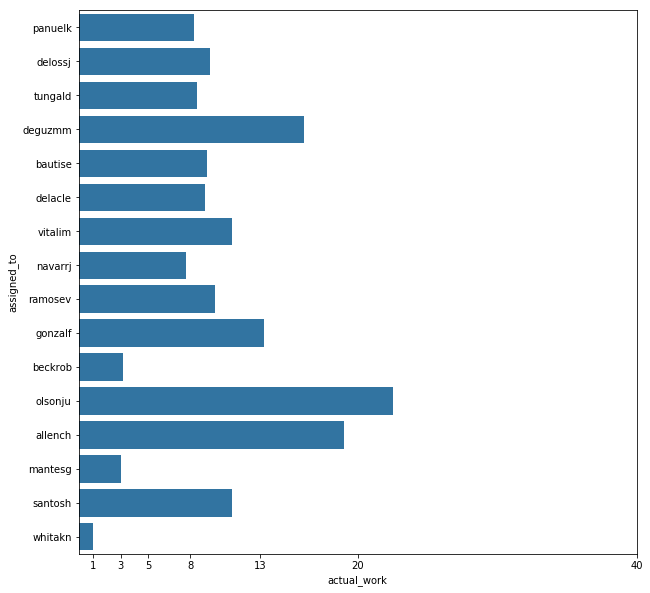

In [45]:
# average actual days of work per resource

plt.figure(figsize = (10, 10))

# resource ordered with the number of work items worked on, regardless of type
sb.barplot(data = workitems, y = 'assigned_to', x = 'actual_work', color = base_color, order = workitems.assigned_to.value_counts().index, ci = None)
plt.xticks([1, 3, 5, 8, 13, 20, 40]);

The first 9 resources are almost have similar capability with exception of `deguzmm`. She is the lead of the team and work items stays longer on her since she usually do other administrative stuff which delays her work. The main developers, `panuelk`, `delossj`, `tungald`, and `bautise` almost have the same capability value.

However, this information is inconclusive when resource have low samples, to back up my investigation, what's the number of work items identified by work item type per resource?

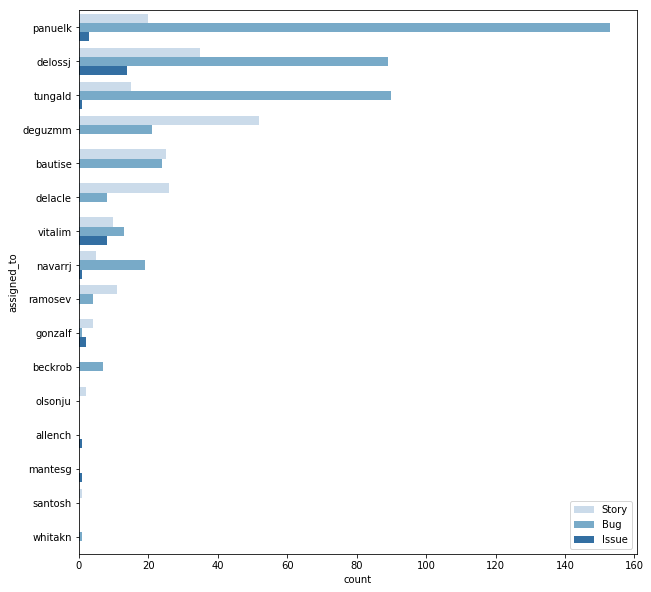

In [46]:
# number of workitems with type per resource

plt.figure(figsize=(10, 10))
sb.countplot(data = workitems, y = 'assigned_to', hue = 'workitem_type', palette = 'Blues', order = workitems.assigned_to.value_counts().index)
plt.legend(loc = 'lower right')

Main developers has enough work to back up my observation above. Despite the fact that `panuelk` has worked on more items, most of it are of type bugs.

### Modern Era (Hybrid and Scrum)

As observed in the graph, number of work per month started to normalize from May 2017. Let's try to cut our dataset from there and create new graphs for observations.

Before we continue our investigation, let's find out the actual days of work ratio between bugs and stories. This will help us put weight to work item types category.

In [47]:
# on our previous observation, the waterfall era may skew our data, let's filter then to not include waterfall
story_median = workitems[(workitems.workitem_type == 'Story') & (workitems.era != 'waterfall')].actual_work.median()
bug_median = workitems[(workitems.workitem_type == 'Bug') & (workitems.era != 'waterfall')].actual_work.median()

print(story_median, bug_median)

# compute the weights on basis of 2 for stories
story_weight = 2
bug_weight = 2 * (bug_median/story_median)

print(story_weight, bug_weight)

12.0 5.0
2 0.8333333333333334


Stories took twice as long to complete in average than bugs. To simplify the weight, let's just assign 2 for stories and 1 (rounded from 0.833) for bugs.

In [48]:
workitems['wi_weight'] = 0

#let's round of the weights for simplicity

workitems.loc[workitems.workitem_type == 'Bug', 'wi_weight'] = 1
workitems.loc[workitems.workitem_type == 'Story', 'wi_weight'] = 2

workitems.wi_weight = workitems.wi_weight.astype(int)

# create a subset of the data frame to exclude waterfall
workitems_scrums = workitems[workitems.era != 'waterfall']

What's the new correlation of actual days of work vs estimates on modern era?

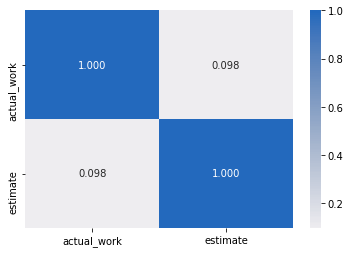

In [49]:
# heat map correlation of the new subset for actual work and estimates for modern era (hybrid, scrums)

work_est = workitems_scrums[~workitems_scrums.estimate.isna()]

sb.heatmap(work_est[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

The correlation is now a lot closer to zero, which further means, that actual work and estimates has no relationship at all.

What's the distribution of actual days of work and estimates for the modern era?

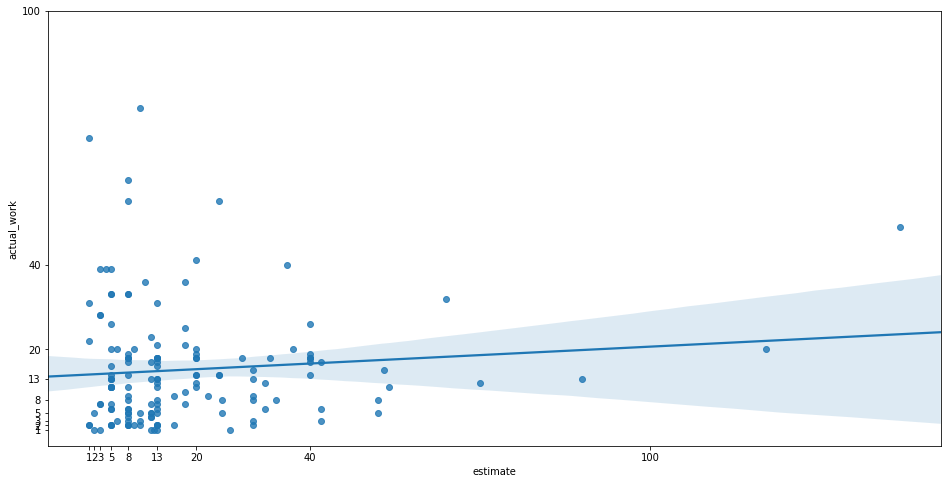

In [50]:
# distribution of actual days of work and estimates, with regression line

plt.figure(figsize=(16, 8))
sb.regplot(data = work_est, x = 'estimate', y = 'actual_work')
plt.xticks(ticks)
plt.yticks(ticks);

We can see the regression line almost flattening out. This further conclude that estimates and actual days of work has no relationship when waterfall era is removed.

What's the capability per work item type on the modern era?

(-0.5, 1.5)

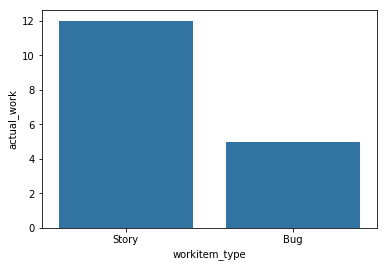

In [51]:
# average (median) actual days of work per work item type

sb.barplot(data = workitems_scrums, x = 'workitem_type', y = 'actual_work', color = base_color, estimator = np.median, ci = None);
plt.xlim([-0.5, 1.5]) # remove issues work item type since we don't have them anymore on the modern era

The bug closes out a bit compared to before. It means that stories are getting smaller and more manageable.

Let's make sure that we have a good health of data. Are there any outliers? What are the distribution of values?

(-0.5, 1.5)

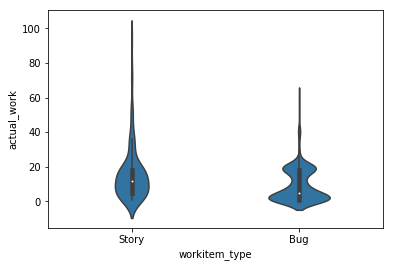

In [52]:
# distribution, median, percentiles, outliers of average days of work per work item type

sb.violinplot(data = workitems_scrums, x = 'workitem_type', y = 'actual_work', color = base_color)
plt.xlim([-0.5, 1.5]) # remove issues

For stories, most of the data are below 20, and for bugs, it's still consistent that most of them are done on 1 day.

Since we now know that work item types has different weight, what's the distribution of work with work item types per resource?

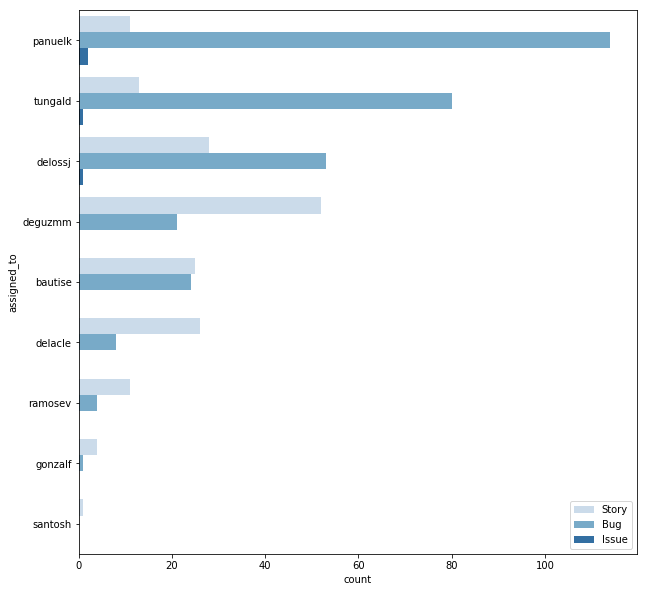

In [53]:
# number of work with types for each resource

plt.figure(figsize=(10, 10))
sb.countplot(data = workitems_scrums, y = 'assigned_to', hue = 'workitem_type', palette = 'Blues', order = workitems_scrums.assigned_to.value_counts().index)
plt.legend(loc = 'lower right');

The distribution is still the same, `panuelk` holds most bugs worked on and `deguzmm` worked most on stories.

What's the capability of each resource in the modern era?

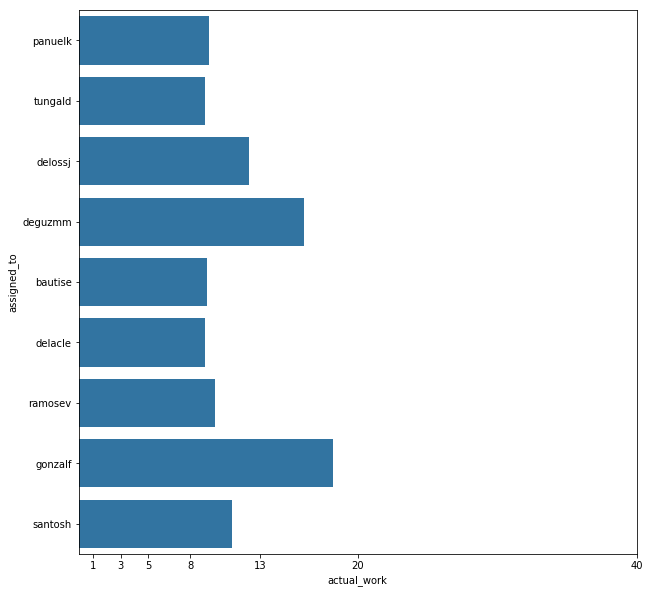

In [54]:
# average days of work per resource

plt.figure(figsize = (10, 10))
sb.barplot(data = workitems_scrums, y = 'assigned_to', x = 'actual_work', color = base_color, order = workitems_scrums.assigned_to.value_counts().index, ci = None)
plt.xticks([1, 3, 5, 8, 13, 20, 40]);

Capability on modern era is more balanced (with spikes with deguzmm and gonzalf). As for the spikes, these are a good points for discussion with the team.

### `workitem_type` with weight

`wi_weight` has been extracted above, to put numerical value for the work item types. With this new feature, what is the total amount of work per month?

(30, 58)

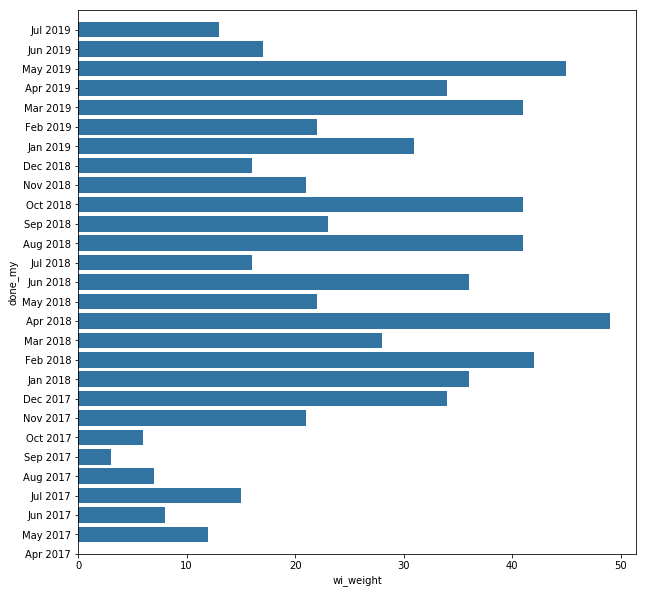

In [55]:
# Total amount of work per month

# total amount of work = sum of work item weight (wi_weight)
plt.figure(figsize = (10, 10))
g = sb.barplot(data = workitems_scrums, x = 'wi_weight', y = 'done_my', estimator = np.sum, color = base_color, ci = None)
g.set_ylim(30, 58) # limit to modern era

I can't find any balance of work provided for each month. Maybe this is due to different sizes of stories.

What about the total work done per resource? Previously, we observed a huge gap to `panuelk`.

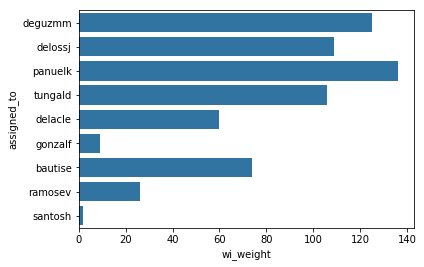

In [56]:
# total work done per resource

sb.barplot(data = workitems_scrums, x = 'wi_weight', y = 'assigned_to', estimator = np.sum, color = base_color, ci = None)

Getting the weight gives us more accurate view as to the amount of work done per month and per resource. It is now a bit more balance with each member of the main team. Interestingly enough we did not find any pattern as the graph shows that every month, not the same amount of work is distributed to the team. This maybe due to poor estimation which resulted to uneven work amount per month.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Estimation is an integral part of software development. It helps stakeholders forecast when the project is going to completed, and how many items should be committed to work on a certain timeframe. After comparing the estimates with the actual work, we found out that the estimation activity done by the team has low correlation to the actual work done. With this we may need to find ways to improve how estimation should be done to the team. We may find out more insight when we compare more variables at once. 

Another interesting observation is how work item types relates to the actual work done. Stories took much longer to finish than bugs and issues. Given this information, it's hard to determine the teams capability with work items with different weight are being worked on a certain timeframe.

We also measured capability (average cycle time) of each resource, the main developers (panuelk, delossj, tungald, bautise) are almost on the same capability rating except deguzmm, which makes sense because she is their lead which has other things on her plate that delays finishing her work items.

After cutting the data from post-waterfall era, we found more interesting patterns with the data. Correlation between estimate and actual work now very close to zero, meaning, even how much estimate we do, the actual days of work almost stays the same. This gives proof that we might better end up implementing counting of stories/bugs rather than estimates.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The team underwent three major changes in software development style (era). Number of workitems done in a month varies a lot during waterfall era, which makes this analysis more challenging. As we observed above, the number of items being worked on started to stabilize starting November 2017, 6 months after we transition from waterfall to hybrid.

Also, interesting observation, during early stage (waterfall), software development produced a lot more bugs than on hybrid and scrum era, which can delay the productivity of the team.

## Multivariate Exploration

We are going to focus more on reinforcing our findings with regards to estimates. Also, we are going to find other ways to determine on how to improve the work flow of the team, by studying the distribution patterns and working with average.

### Actual and Estimation Reinforcement

What are the distribution of estimates and actual days of work? Classify them by work item type. Limit the observation to modern era.

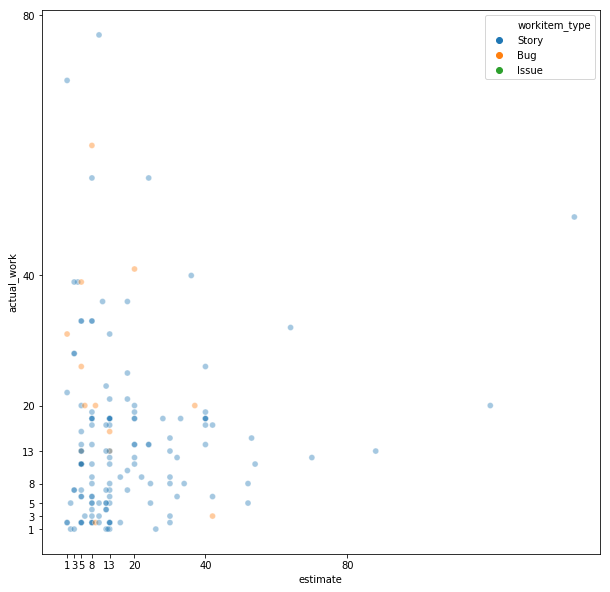

In [57]:
# scatter distribution of actual days of work and estimates, classified with work item type, limit to modern era

plt.figure(figsize = (10, 10))
sb.scatterplot(data = workitems_scrums, x = 'estimate', y = 'actual_work', hue = 'workitem_type', alpha = 0.4)
ticks = [1, 3, 5, 8, 13, 20, 40, 80]
plt.xticks(ticks)
plt.yticks(ticks);

The clump is still visible from 1-20 actual days of work and 1-40 estimates, but of no relation, regardless of work item types.

Does it have a remarking difference with the entire dataset?

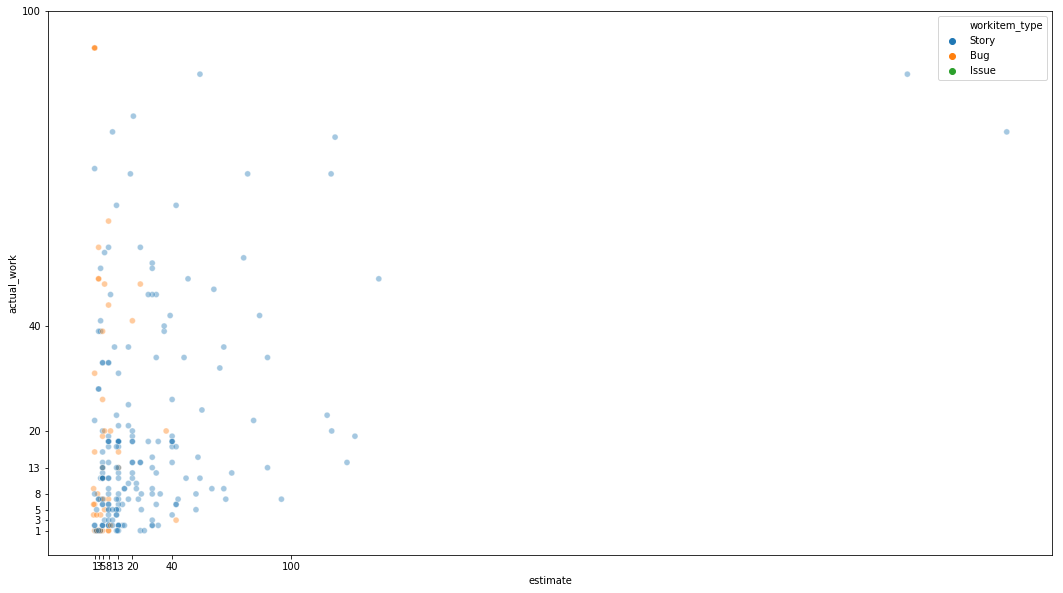

In [58]:
# scatter distribution of actual days of work and estimates, classified with work item type, entire dataset

plt.figure(figsize = (18, 10))
sb.scatterplot(data = workitems, x = 'estimate', y = 'actual_work', hue = 'workitem_type', alpha = 0.4)
ticks = [1, 3, 5, 8, 13, 20, 40, 100]
plt.xticks(ticks)
plt.yticks(ticks);

It has the same clump, however, the noise is lot more visible.

Let's look more closely with the clump to solidify my observation. Where's the area in actual days of work and estimates that most values are located?

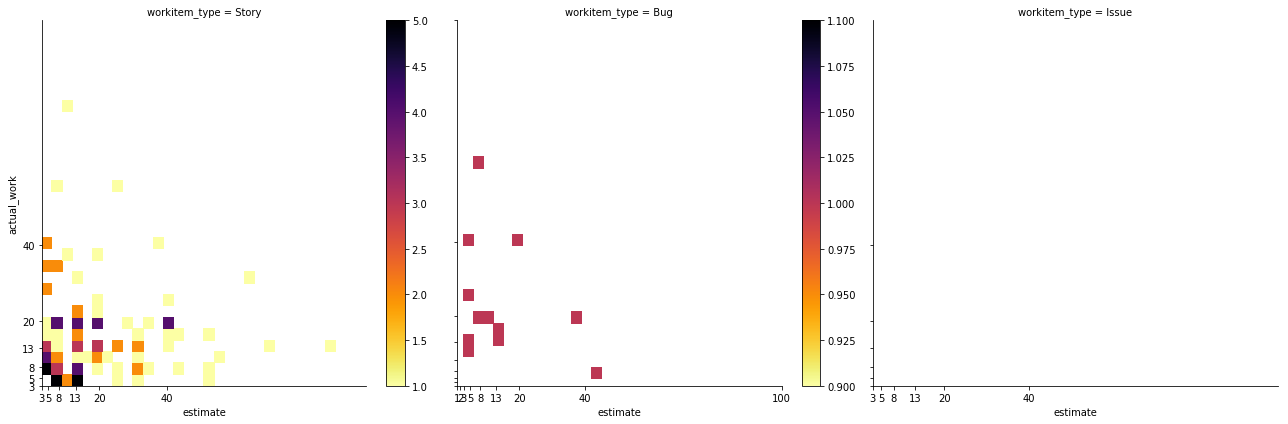

In [59]:
# heat map of where the estimates + actual work clumps, classified by work item types

# create a method helper with FacetGrid to create separate hist2d for each workitem type
def hist2grid(x, y, **kwargs):
    bins = np.arange(3, 100, 3)
    ticks = [1, 2, 3, 5, 8, 13, 20, 40, 100]
    g = plt.hist2d(x, y, bins = [bins, bins], cmap = 'inferno_r', cmin = 1)
    plt.colorbar(g[3])
    plt.xticks(ticks)
    plt.yticks(ticks)

g = sb.FacetGrid(data = workitems_scrums[~workitems_scrums.estimate.isna()], col = 'workitem_type', height = 6)
g.map(hist2grid, 'estimate', 'actual_work')

In the recent era (hybrid and scrums), the outliers are more visible from 20 and above. This also solidify our observation of the area we mentioned above (1-20 actual work, 1-40 estimates). We'll make use of this information later.

### Work distribution

What is the teams' capability per month? Are they improving?

C:\Users\netxph\scoop\apps\anaconda3\2019.03\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
C:\Users\netxph\scoop\apps\anaconda3\2019.03\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


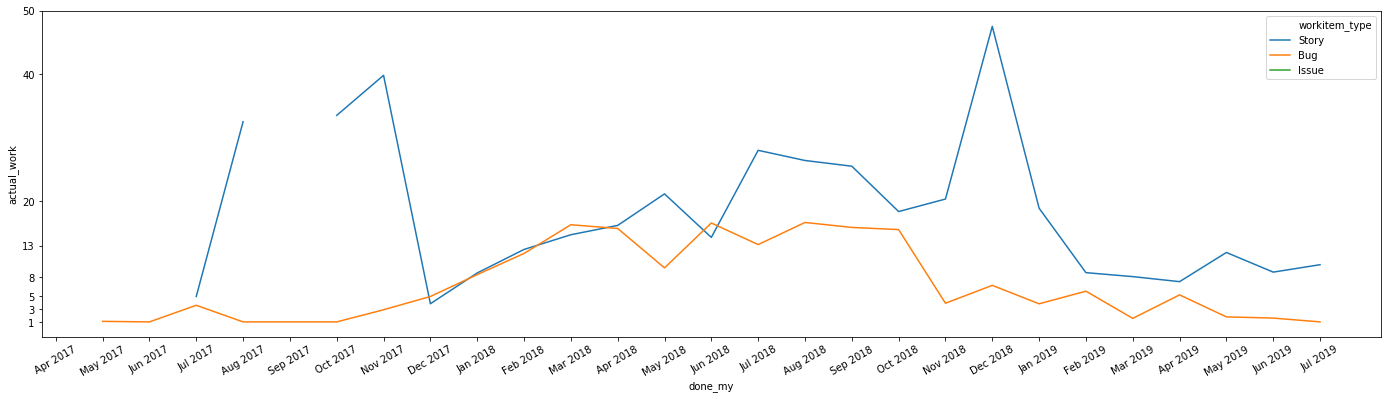

In [60]:
# line plot trends for the average actual days of work classified by work item type

# get the average actual_work, per month
work_actual_mean = workitems_scrums.groupby(['done_year', 'done_month', 'done_my', 'workitem_type']).actual_work.mean().reset_index()

plt.figure(figsize = (24, 6))

g = sb.lineplot(data = work_actual_mean, x = 'done_my', y = 'actual_work', hue = 'workitem_type')
plt.yticks([1, 3, 5, 8, 13, 20, 40, 50]);
plt.draw()
g.set_xticklabels(g.get_xticklabels(), rotation = 30);

Removing the spike last December 2018, the team improves but flattens from February 2019 to present. Let's try to simplify this graph by combining the work item types.

C:\Users\netxph\scoop\apps\anaconda3\2019.03\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


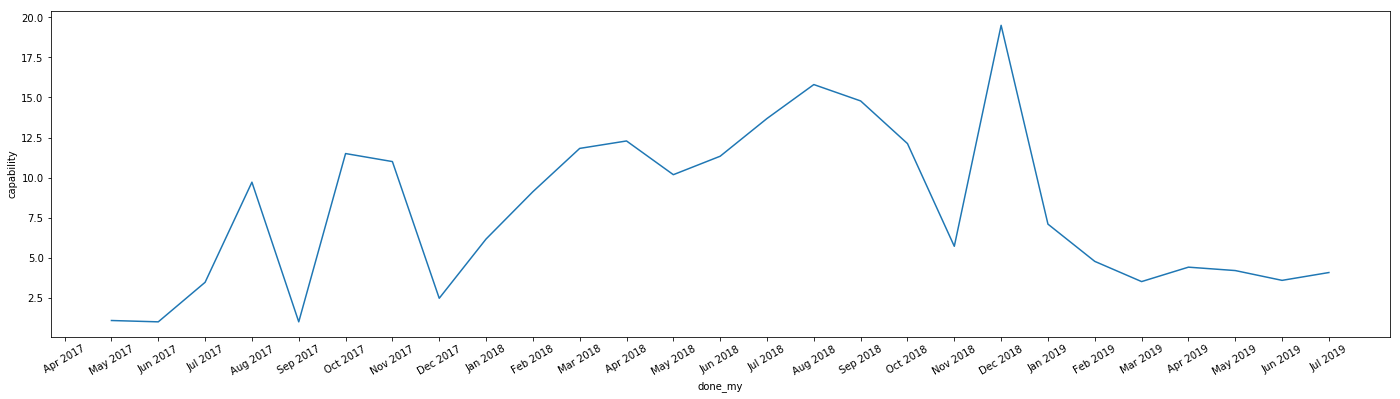

In [61]:
# team capability per month, now computed with workitem types properly summed with weights
plt.figure(figsize = (24, 6))

#get the sum of actual work and sum of total number of work
team_cap = workitems_scrums[workitems.workitem_type != 'Issue'].groupby('done_my').agg({'actual_work': 'sum', 'wi_weight' : 'sum'}).reset_index()

# capability = total actual work days / total work done with weights
team_cap.loc[team_cap.wi_weight != 0, 'capability'] = team_cap.actual_work / team_cap.wi_weight
g = sb.lineplot(data = team_cap, x = 'done_my', y = 'capability')
plt.draw() # hack, get_xticklabels needs to be drawn first
g.set_xticklabels(g.get_xticklabels(), rotation = 30);

Consistent with the data above, but presented in a cleaner graph.

What is the capability of main developers per work item types? Are they almost the same?

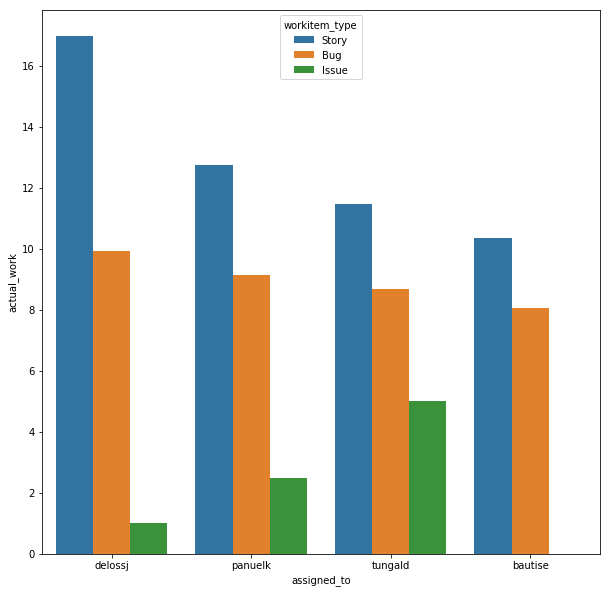

In [62]:
# capability for each main developers distinguished by work item types

main_devs = workitems_scrums[workitems_scrums.assigned_to.isin(['panuelk', 'delossj', 'tungald', 'bautise'])]

plt.figure(figsize = (10, 10))
sb.barplot(data = main_devs, x = 'assigned_to', y = 'actual_work', hue = 'workitem_type', ci = None);

This graph shows a bit of balance on skills to complete tasks for each primary developers. Therefore, we can safely ignore that tasks can be accomplished on almost the same time by any of the developers. Points for discussion perhaps, delossj, took a lot more time when doing stories. Let's dissect them individually and look at their capability per month.

What's the capability of each resource per month? Are they all improving? Is there someone getting worst?

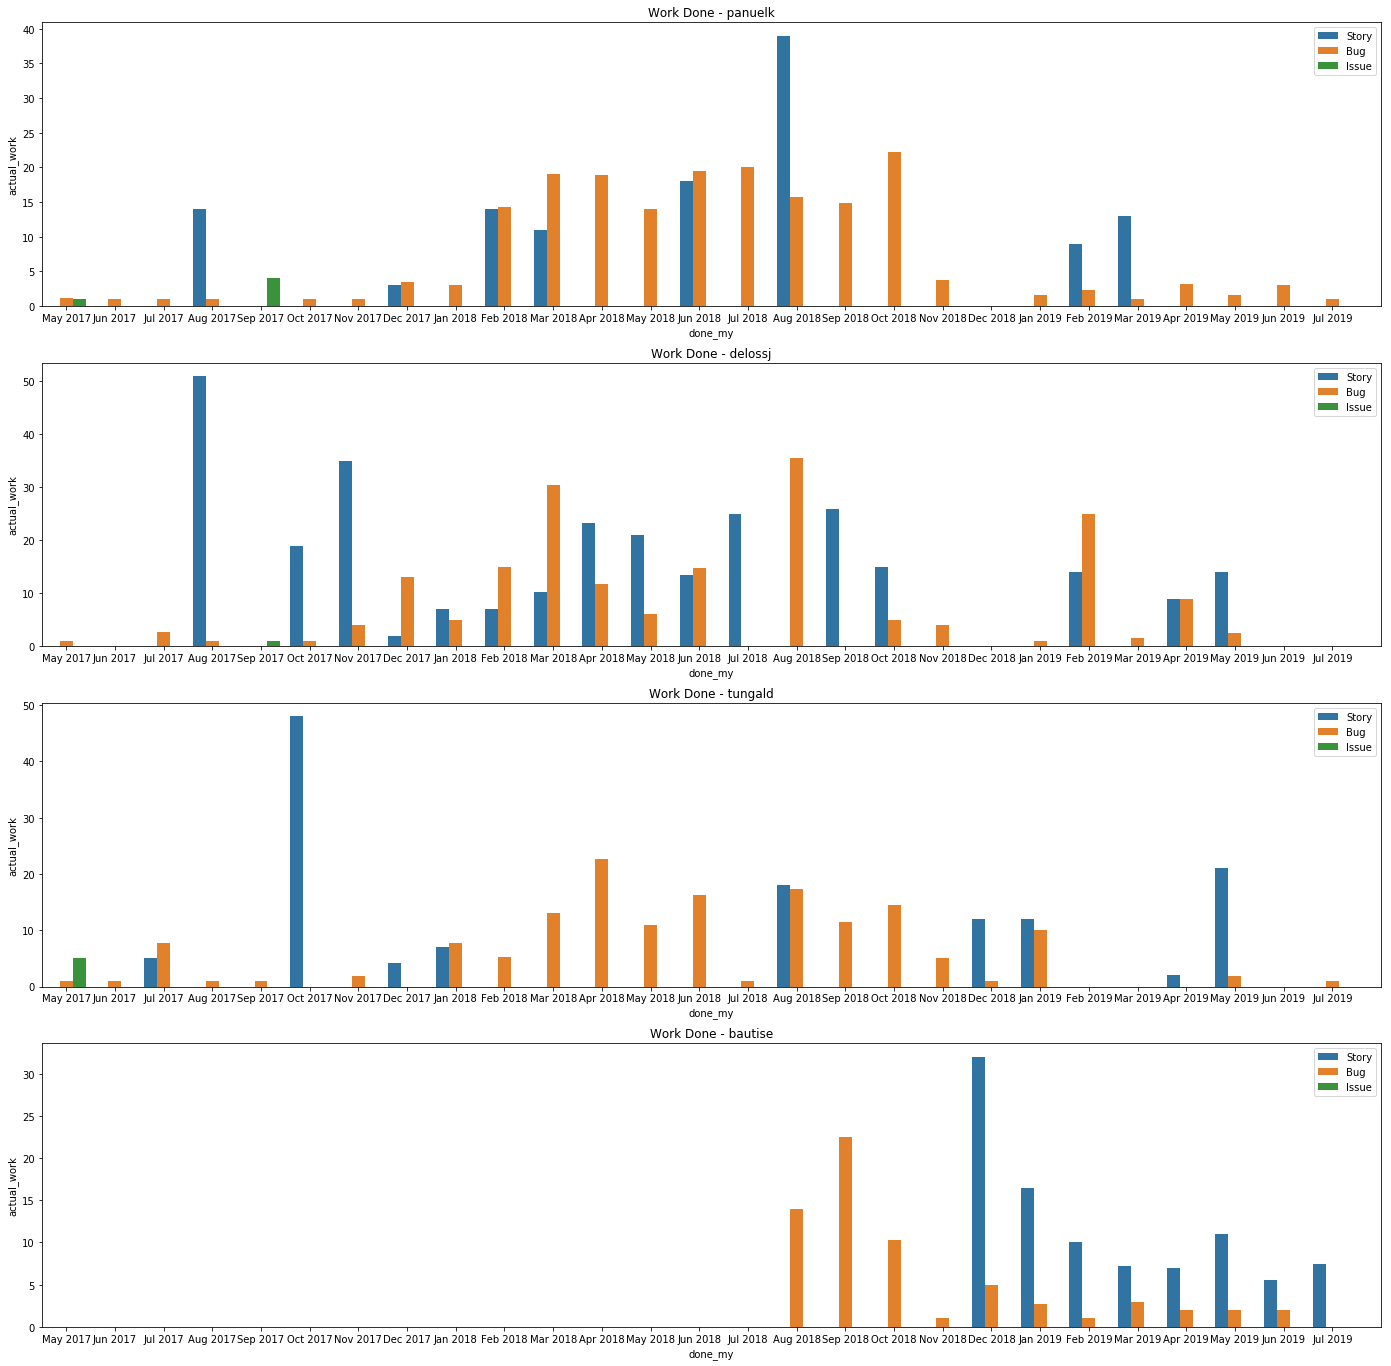

In [63]:
#plot capability of each resource per month, limit to modern era

plt.figure(figsize=(24, 24))
plt.subplot(4, 1, 1)
g = sb.barplot(data = workitems_scrums[workitems_scrums.assigned_to == 'panuelk'], x = 'done_my', y = 'actual_work', hue = 'workitem_type', ci = None)
g.set_title('Work Done - panuelk')
g.set_xlim(30.5, 58) #modern era
plt.legend(loc = 'upper right')

plt.subplot(4, 1, 2)
g = sb.barplot(data = workitems_scrums[workitems_scrums.assigned_to == 'delossj'], x = 'done_my', y = 'actual_work', hue = 'workitem_type', ci = None)
g.set_title('Work Done - delossj')
g.set_xlim(30.5, 58) #modern era
plt.legend(loc = 'upper right')

plt.subplot(4, 1, 3)
g = sb.barplot(data = workitems_scrums[workitems_scrums.assigned_to == 'tungald'], x = 'done_my', y = 'actual_work', hue = 'workitem_type', ci = None)
g.set_title('Work Done - tungald')
g.set_xlim(30.5, 58) #modern era
plt.legend(loc = 'upper right')

plt.subplot(4, 1, 4)
g = sb.barplot(data = workitems_scrums[workitems_scrums.assigned_to == 'bautise'], x = 'done_my', y = 'actual_work', hue = 'workitem_type', ci = None)
g.set_title('Work Done - bautise')
g.set_xlim(30.5, 58) #modern era
plt.legend(loc = 'upper right');

bautise worked mostly on stories recently, while delossj worked mostly on bugs. tungald doesn't have work on Feb, Mar and Jun 2019. The team is practicing paring, and he may not be the primary during those months. Looking at this individually, `tungald` almost stayed the same, the rest, have a very slow improvement. To augment this information, let's look at the work distribution with weight this time.

What is the work distribution, for each of the main developers, this time reinforced with work item weights? Is it balanced?

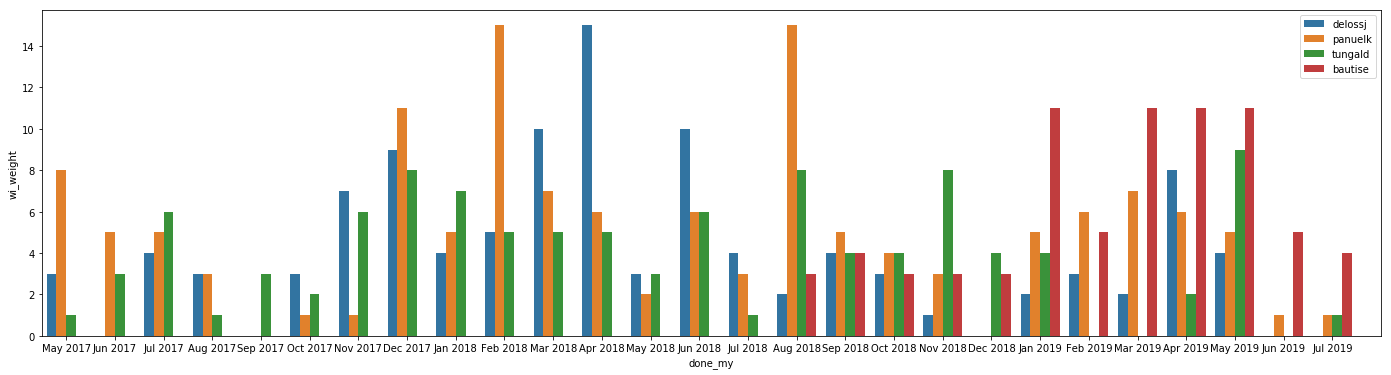

In [64]:
# total amount of work (sum of wi_weight) for each main developers per month

plt.figure(figsize = (24, 6))
g = sb.barplot(data = main_devs, x = 'done_my', y = 'wi_weight', hue = 'assigned_to', estimator = np.sum, ci = None)
g.set_xlim(30.5, 58)
plt.legend(loc = 'upper right')

We found no pattern and balance on the graph. Again, maybe due to different story sizes.

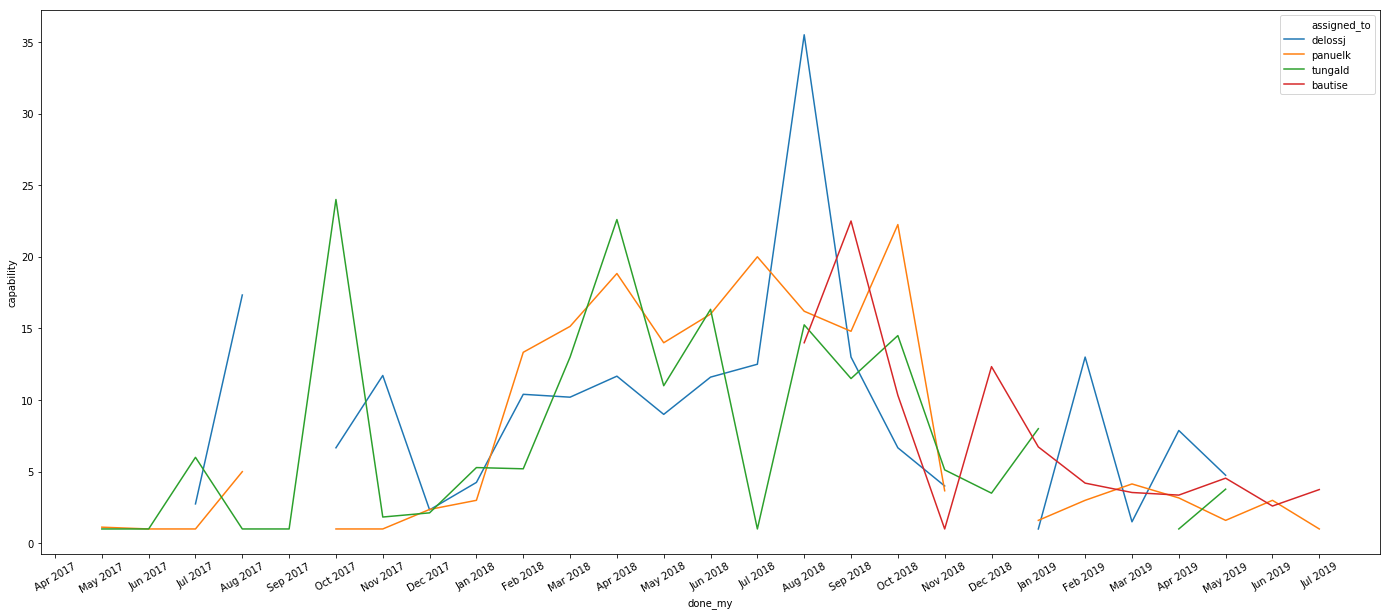

In [65]:
# capability trends (line plot) for each resource per month

# extract the capability per month first, filter by main devs, remove issue as they will result to division by zero
# after that, aggregate by getting the sum of actual work and workitem weight
dev_cap = workitems_scrums[ \
    (workitems_scrums.assigned_to.isin(['panuelk', 'delossj', 'tungald', 'bautise'])) & \
    (workitems_scrums.workitem_type != 'Issue') \
].groupby(['done_my', 'assigned_to']).agg({'actual_work': 'sum', 'wi_weight' : 'sum'}).reset_index()

dev_cap['capability'] = dev_cap.actual_work / dev_cap.wi_weight # compute capability = total actual work / total work done

plt.figure(figsize = (24, 10))
g = sb.lineplot(data = dev_cap, x = 'done_my', y = 'capability', hue = 'assigned_to')
plt.draw() #hack for xticklabels
g.set_xticklabels(g.get_xticklabels(), rotation = 30);

For everyone, the it's visible that everyone is getting better, flattening on the later months.

How productive is the team per month? Are they improving?

(36.5, 58)

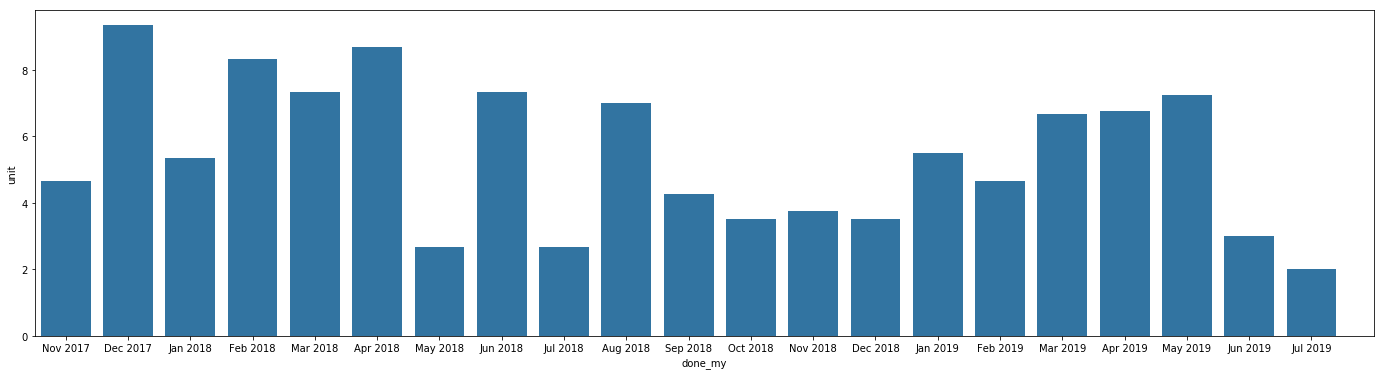

In [66]:
# get the productivity unit per month, productivity unit = total of work done / number of resources

weight_sums = main_devs.groupby(['done_year', 'done_month', 'done_my', 'assigned_to']).wi_weight.sum().reset_index()
weight_sums = weight_sums.groupby(['done_year', 'done_month', 'done_my']).agg({'assigned_to': 'count', 'wi_weight': 'sum'}).reset_index()
weight_sums['unit'] = weight_sums.wi_weight / weight_sums.assigned_to

plt.figure(figsize = (24, 6))

g = sb.barplot(data = weight_sums, x = 'done_my', y = 'unit', color = base_color)
g.set_xlim(36.5, 58)

We can see the individual's productivity here (higher, number is better), which went down in the last 2 months. In positive note, we can see a somehow slow increase in teams productivity through May 2019.

How is the work distributed through time? Is there a balance between stories and bugs?

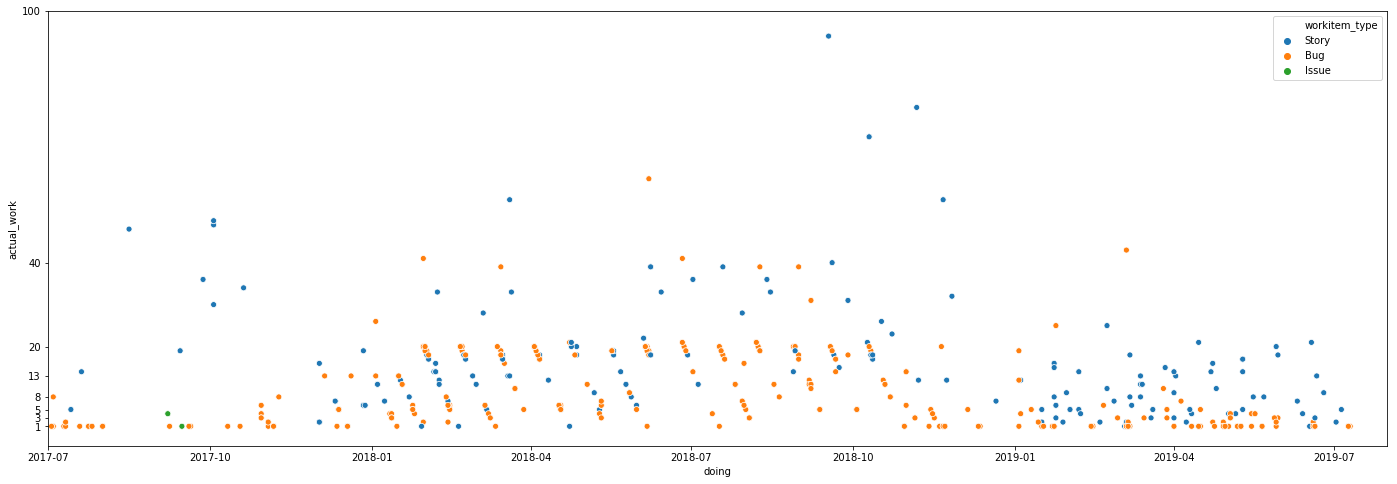

In [67]:
# scatter plot distribution of work items with the actual days of work through time, distinguished by work item type, limit to modern era

plt.figure(figsize = (24, 8))
sb.scatterplot(data = workitems_scrums, x = 'doing', y = 'actual_work', hue = 'workitem_type')
plt.xlim(pd.to_datetime('2017-07-01'), pd.to_datetime('2019-07-31')) # modern era
plt.yticks([1, 3, 5, 8, 13, 20, 40, 100]);

We notice the balance on the recent months, but the work before the year 2019, are a bit scattered.

Are there any noticeable difference if we observe the distribution through time with the entire database?

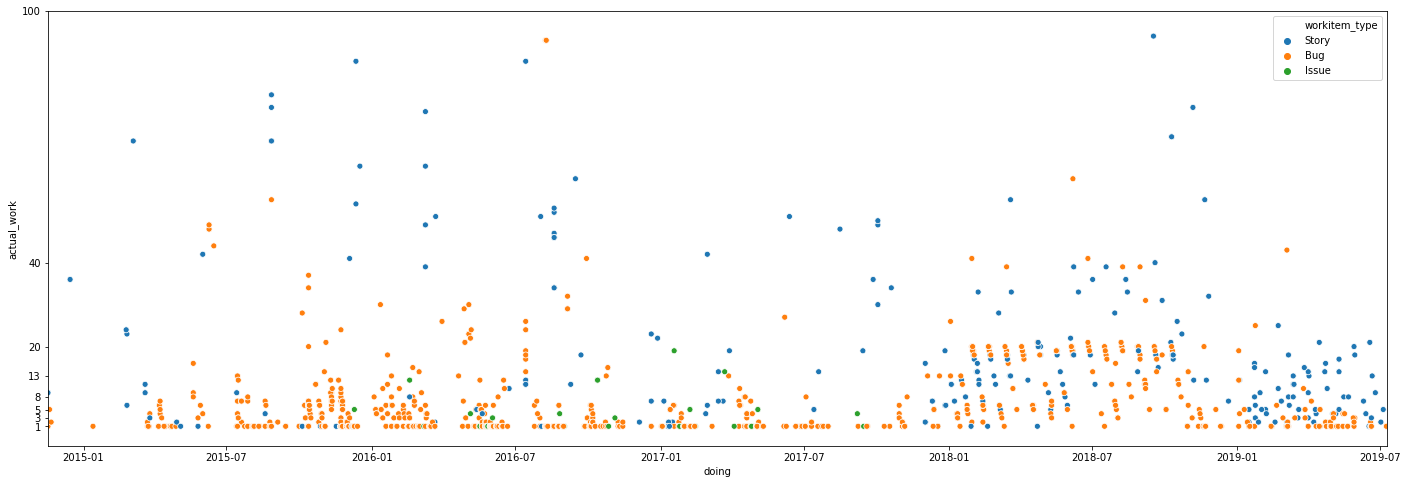

In [68]:
# scatter plot distribution of work items with the actual days of work through time, distinguished by work item type, entire dataset

plt.figure(figsize = (24, 8))
sb.scatterplot(data = workitems, x = 'doing', y = 'actual_work', hue = 'workitem_type')
plt.xlim(workitems.doing.min(), workitems.doing.max())
plt.yticks([1, 3, 5, 8, 13, 20, 40, 100]);

We can visibly see more outliers on the previous era, and a lot of bugs clumped at the bottom.

Are there any difference if we just limit our views to main developers?

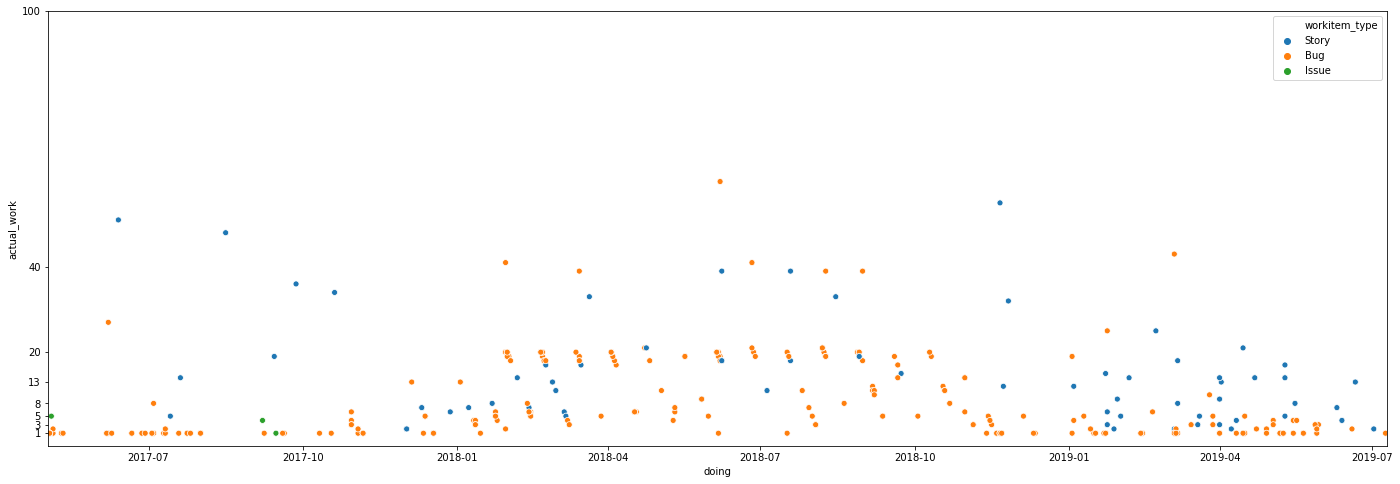

In [69]:
# scatter plot distribution of work items with the actual days of work through time, distinguished by work item type, limit to modern era, limit to main developers

plt.figure(figsize = (24, 8))
sb.scatterplot(data = main_devs, x = 'doing', y = 'actual_work', hue = 'workitem_type')
plt.xlim(main_devs.doing.min(), main_devs.doing.max())
plt.yticks([1, 3, 5, 8, 13, 20, 40, 100]);

It's the same with the observation above. No noticeable difference.

In [70]:
# amount of work a developer can do in a month
print(weight_sums.unit.mean())

# average amount of days each work can be done
print(main_devs.actual_work.mean())

4.907407407407407
9.914772727272727


Here's a scatter plot of work items done through time. This again proves that bugs are somehow fast to complete compared to stories. Also we can observe here that bugs are getting resolved faster, stories are clumping more at the bottom.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Estimation's discrepancy has been reinforced with a view of the heat map for every work item type. We can see that they mostly clump from 1 to 20 for the actual work, and 1 to 40 for the estimate. As to their relation, we can conclude any correlation between the two. 

There's a bit of chaos in the early months, but we start to see a pattern of decreased effort to fix bugs and a steady effort to code stories. 

Since the team is doing paring, we noticed that skills are balanced which we can ease the effort of estimating by not worrying who will do it.

As for productivity, in the recent year, capability is starting to normalize and we can visibly observe the pattern that the team is improving in terms of lead time.

### Were there any interesting or surprising interactions between features?

Workload distribution is not the same based on average weight of stories and bugs. In the recent months, there's an increase of stories distributed to `bautise`, which we may need to perform inquiry to the team as to why. Trying to get the ratio of stories and bugs, we found out that stories are twice the effort of fixing bugs, which is the basis of the workitem weight.